# **Градиентный бустинг**

**Задача классификации на датасете data/data.csv. ЦЕЛЕВАЯ ПЕРЕМЕННАЯ - *Churn*.**

Обучим классификатор градиентного бустинга, используя безлайны без сильной обработки выборок и оценим точности предсказания с помощью основных метрик

  Размер: 7043 строк, 21 столбцов

Первые 3 строки данных:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes



Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

,Метрика,Значение
0,Accuracy,0.797019
1,Precision,0.661765
2,Recall,0.481283
3,F1-Score,0.557276
4,ROC-AUC,0.832690


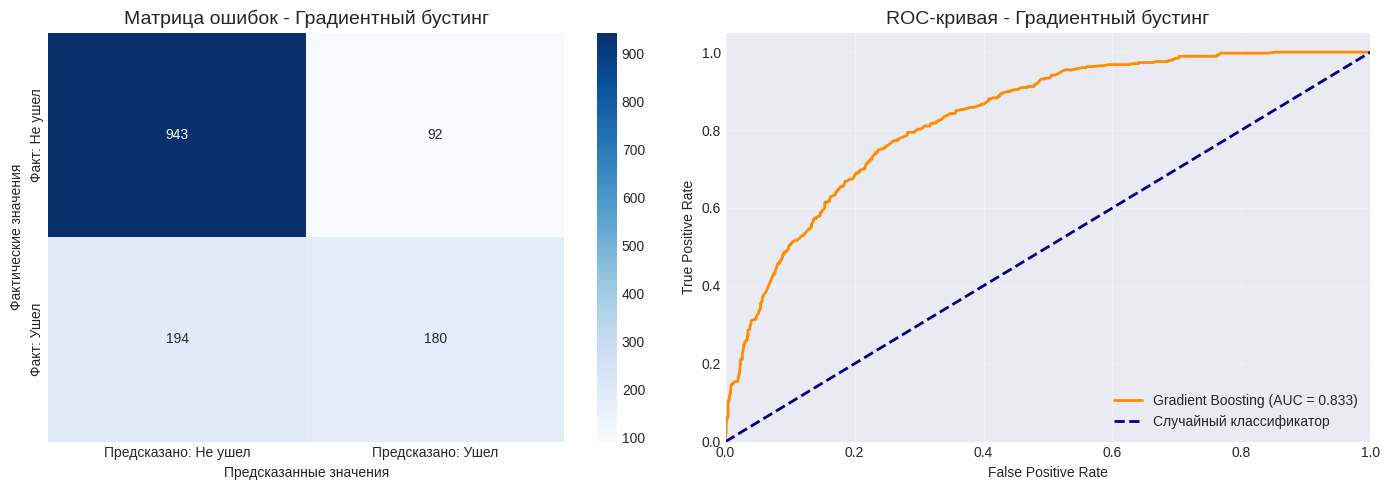

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv('data/data.csv')
print(f"  Размер: {df.shape[0]} строк, {df.shape[1]} столбцов\n")

print("Первые 3 строки данных:")
display(df.head(3))
print("\nИнформация о столбцах:")
df.info()

df_clean = df.copy()

# удалим айди пользователя, он не требуется
df_clean = df_clean.drop('customerID', axis=1)

# преобразуем переменную TotalCharges и целевую переменную Churn
df_clean['TotalCharges'] = df_clean['TotalCharges'].replace(' ', '0')
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'])
df_clean['Churn'] = df_clean['Churn'].map({'No': 0, 'Yes': 1})

# удалим категориальные признаки
categorical_cols = df_clean.select_dtypes(include=['object']).columns
df_numeric = df_clean.drop(categorical_cols, axis=1)

# все признаки для обучения
print("\nЧисловые признаки для бейзлайна:")
print(df_numeric.columns.tolist())
print(f"\nИтоговый размер данных для модели: {df_numeric.shape}")

# разделим на обучающую и тестовую выборки
X = df_numeric.drop('Churn', axis=1)
y = df_numeric['Churn']

print(f" признаки (X): {X.shape}")
print(f" целевая переменная (y): {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f" X_train: {X_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_train: {y_train.shape} (распределение: {y_train.value_counts().to_dict()})")
print(f" Y_test: {y_test.shape} (распределение: {y_test.value_counts().to_dict()})")



# Создаем и обучаем модель градиентного бустинга для классификации
gb_classifier = GradientBoostingClassifier(random_state=42, n_estimators=50)
gb_classifier.fit(X_train, y_train)

print("\nОбучение завершено")

# Делаем предсказания
y_pred = gb_classifier.predict(X_test)
y_pred_proba = gb_classifier.predict_proba(X_test)[:, 1]

print("Предсказания сделаны")

# Оцениваем точность модели основными метриками
accuracy_gb = accuracy_score(y_test, y_pred)
precision_gb = precision_score(y_test, y_pred)
recall_gb = recall_score(y_test, y_pred)
f1_gb = f1_score(y_test, y_pred)
roc_auc_gb = roc_auc_score(y_test, y_pred_proba)

metrics_df_gb = pd.DataFrame({
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Значение': [accuracy_gb, precision_gb, recall_gb, f1_gb, roc_auc_gb]
})

print("\nПолучившиеся метрики:")
display(metrics_df_gb)

# Матрица ошибок
cm_gb = confusion_matrix(y_test, y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Предсказано: Не ушел', 'Предсказано: Ушел'],
            yticklabels=['Факт: Не ушел', 'Факт: Ушел'])
ax1.set_title('Матрица ошибок - Градиентный бустинг', fontsize=14)
ax1.set_ylabel('Фактические значения')
ax1.set_xlabel('Предсказанные значения')

# ROC-кривая
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba)
ax2.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.3f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайный классификатор')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC-кривая - Градиентный бустинг', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Теперь имплиментируем классификатор градиентного бустинга и обучим его на бейзлайне, посмотрим на метрики

  Размер: 7043 строк, 21 столбцов

Первые 3 строки данных:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes



Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

,Метрика,Значение
0,Accuracy,0.797019
1,Precision,0.664179
2,Recall,0.475936
3,F1-Score,0.554517
4,ROC-AUC,0.831891


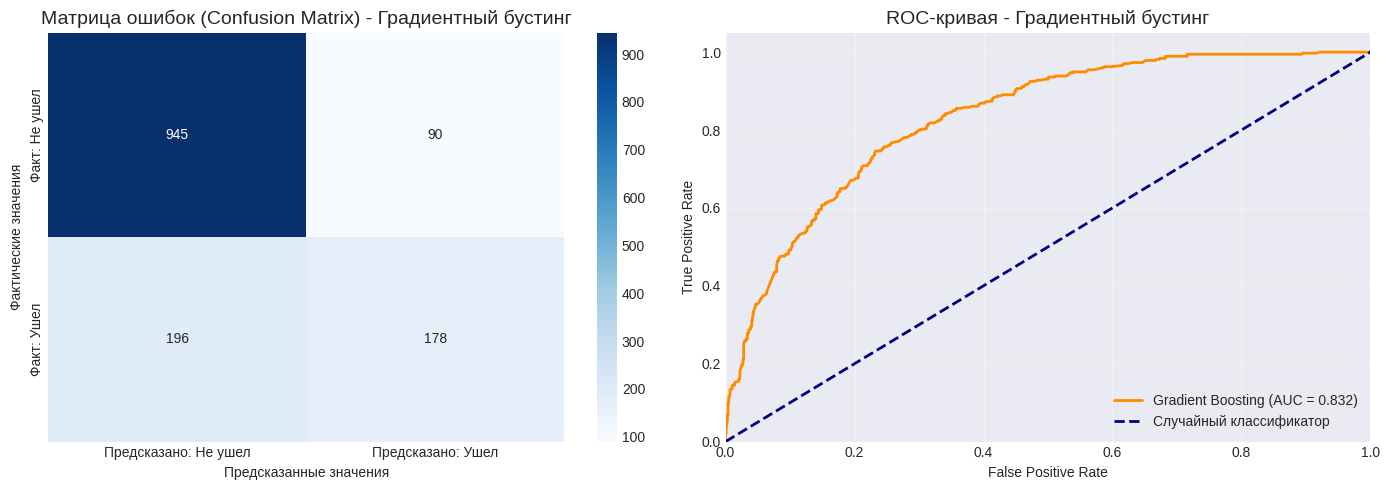

In [ ]:

import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns

#имплиментированный классификатор
class MyGradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3,
                 min_samples_split=2, subsample=1.0, random_state=42):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.subsample = subsample
        self.random_state = random_state
        self.trees = []
        self.initial_prediction = None
        self.classes_ = None
        self.n_features_ = None

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -250, 250)))

    def _log_loss_gradient(self, y_true, y_pred_log_odds):
        p = self._sigmoid(y_pred_log_odds)
        return p - y_true

    def _log_loss_hessian(self, y_true, y_pred_log_odds):
        p = self._sigmoid(y_pred_log_odds)
        return p * (1 - p)

    class RegressionTree:
        def __init__(self, max_depth=3, min_samples_split=2):
            self.max_depth = max_depth
            self.min_samples_split = min_samples_split
            self.tree = None

        def _calculate_mse(self, y):
            if len(y) == 0:
                return 0
            return np.var(y)

        def _find_best_split(self, X, gradients, hessians):
            best_gain = -1
            best_feature = None
            best_threshold = None

            n_samples, n_features = X.shape

            G = np.sum(gradients)
            H = np.sum(hessians)

            for feature_idx in range(n_features):
                feature_values = X[:, feature_idx]
                sorted_indices = np.argsort(feature_values)
                sorted_features = feature_values[sorted_indices]
                sorted_gradients = gradients[sorted_indices]
                sorted_hessians = hessians[sorted_indices]

                if sorted_features[0] == sorted_features[-1]:
                    continue

                G_left = 0
                H_left = 0

                for i in range(1, len(sorted_features)):
                    if sorted_features[i] == sorted_features[i-1]:
                        G_left += sorted_gradients[i-1]
                        H_left += sorted_hessians[i-1]
                        continue

                    G_left += sorted_gradients[i-1]
                    H_left += sorted_hessians[i-1]
                    G_right = G - G_left
                    H_right = H - H_left

                    if i < self.min_samples_split or (n_samples - i) < self.min_samples_split:
                        continue

                    gain_left = G_left**2 / (H_left + 1e-6) if H_left > 0 else 0
                    gain_right = G_right**2 / (H_right + 1e-6) if H_right > 0 else 0
                    gain_total = G**2 / (H + 1e-6) if H > 0 else 0

                    gain = gain_left + gain_right - gain_total

                    if gain > best_gain:
                        best_gain = gain
                        best_feature = feature_idx
                        best_threshold = (sorted_features[i-1] + sorted_features[i]) / 2

            return best_feature, best_threshold, best_gain

        def _build_tree(self, X, gradients, hessians, depth):
            n_samples = len(gradients)

            if (depth >= self.max_depth or
                n_samples < 2 * self.min_samples_split or
                np.abs(np.sum(gradients)) < 1e-6):

                leaf_value = -np.sum(gradients) / (np.sum(hessians) + 1e-6)
                return {'type': 'leaf', 'value': leaf_value}

            best_feature, best_threshold, best_gain = self._find_best_split(X, gradients, hessians)

            if best_feature is None or best_gain < 1e-6:
                leaf_value = -np.sum(gradients) / (np.sum(hessians) + 1e-6)
                return {'type': 'leaf', 'value': leaf_value}

            left_mask = X[:, best_feature] <= best_threshold
            right_mask = X[:, best_feature] > best_threshold

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                leaf_value = -np.sum(gradients) / (np.sum(hessians) + 1e-6)
                return {'type': 'leaf', 'value': leaf_value}

            left_subtree = self._build_tree(X[left_mask], gradients[left_mask],
                                           hessians[left_mask], depth + 1)
            right_subtree = self._build_tree(X[right_mask], gradients[right_mask],
                                            hessians[right_mask], depth + 1)

            node = {
                'type': 'node',
                'feature': best_feature,
                'threshold': best_threshold,
                'left': left_subtree,
                'right': right_subtree
            }

            return node

        def _predict_single(self, x, node):
            if node['type'] == 'leaf':
                return node['value']

            if x[node['feature']] <= node['threshold']:
                return self._predict_single(x, node['left'])
            else:
                return self._predict_single(x, node['right'])

        def fit(self, X, gradients, hessians):
            X = np.array(X, dtype=np.float64)
            gradients = np.array(gradients, dtype=np.float64)
            hessians = np.array(hessians, dtype=np.float64)

            self.tree = self._build_tree(X, gradients, hessians, depth=0)
            return self

        def predict(self, X):
            X = np.array(X, dtype=np.float64)
            predictions = []

            for i in range(X.shape[0]):
                pred = self._predict_single(X[i], self.tree)
                predictions.append(pred)

            return np.array(predictions)

    def fit(self, X, y):
        np.random.seed(self.random_state)
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)

        self.n_features_ = X.shape[1]
        self.classes_ = np.unique(y)

        pos_class_ratio = np.mean(y)
        eps = 1e-8
        pos_class_ratio = np.clip(pos_class_ratio, eps, 1 - eps)
        self.initial_prediction = np.log(pos_class_ratio / (1 - pos_class_ratio))

        current_log_odds = np.full(X.shape[0], self.initial_prediction)

        self.trees = []

        for i in range(self.n_estimators):
            gradients = self._log_loss_gradient(y, current_log_odds)
            hessians = self._log_loss_hessian(y, current_log_odds)

            if self.subsample < 1.0:
                n_samples = X.shape[0]
                subsample_size = int(self.subsample * n_samples)
                indices = np.random.choice(n_samples, subsample_size, replace=False)
                X_subsample = X[indices]
                gradients_subsample = gradients[indices]
                hessians_subsample = hessians[indices]
            else:
                X_subsample = X
                gradients_subsample = gradients
                hessians_subsample = hessians

            tree = self.RegressionTree(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )
            tree.fit(X_subsample, gradients_subsample, hessians_subsample)

            tree_predictions = tree.predict(X)

            current_log_odds += self.learning_rate * tree_predictions

            self.trees.append(tree)

            if (i + 1) % 10 == 0 or i == 0 or i == self.n_estimators - 1:
                current_proba = self._sigmoid(current_log_odds)
                current_pred = (current_proba >= 0.5).astype(int)
                train_accuracy = accuracy_score(y, current_pred)

                epsilon = 1e-15
                p = np.clip(current_proba, epsilon, 1 - epsilon)
                log_loss = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

        return self

    def predict_proba(self, X):
        X = np.array(X, dtype=np.float64)
        n_samples = X.shape[0]

        log_odds = np.full(n_samples, self.initial_prediction)

        for tree in self.trees:
            log_odds += self.learning_rate * tree.predict(X)

        proba_positive = self._sigmoid(log_odds)
        proba_negative = 1 - proba_positive

        return np.column_stack([proba_negative, proba_positive])

    def predict(self, X, threshold=0.5):
        proba = self.predict_proba(X)
        return (proba[:, 1] >= threshold).astype(int)

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)


#загрузка днных
df = pd.read_csv('data/data.csv')
print(f"  Размер: {df.shape[0]} строк, {df.shape[1]} столбцов\n")

print("Первые 3 строки данных:")
display(df.head(3))
print("\nИнформация о столбцах:")
df.info()

df_clean = df.copy()

# удалим айди пользователя, он не требуется
df_clean = df_clean.drop('customerID', axis=1)

# преобразуем переменную TotalCharges и целевую переменную Churn
df_clean['TotalCharges'] = df_clean['TotalCharges'].replace(' ', '0')
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'])
df_clean['Churn'] = df_clean['Churn'].map({'No': 0, 'Yes': 1})

# удалим категориальные признаки
categorical_cols = df_clean.select_dtypes(include=['object']).columns
df_numeric = df_clean.drop(categorical_cols, axis=1)

# все признаки для обучения
print("\nЧисловые признаки для бейзлайна:")
print(df_numeric.columns.tolist())
print(f"\nИтоговый размер данных для модели: {df_numeric.shape}")

# разделим на обучающую и тестовую выборки
X = df_numeric.drop('Churn', axis=1)
y = df_numeric['Churn']

print(f" признаки (X): {X.shape}")
print(f" целевая переменная (y): {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f" X_train: {X_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_train: {y_train.shape} (распределение: {y_train.value_counts().to_dict()})")
print(f" Y_test: {y_test.shape} (распределение: {y_test.value_counts().to_dict()})")


my_gb = MyGradientBoostingClassifier(n_estimators=50, subsample=0.8, random_state=42)
my_gb.fit(X_train, y_train.values)

print("\nОбучение завершено")

y_pred = my_gb.predict(X_train)
y_pred_proba = my_gb.predict_proba(X_test)[:, 1]
print("Предсказания сделаны")

# Оцениваем метрики
accuracy_gb = accuracy_score(y_test, y_pred)
precision_gb = precision_score(y_test, y_pred, zero_division=0)
recall_gb = recall_score(y_test, y_pred, zero_division=0)
f1_gb = f1_score(y_test, y_pred, zero_division=0)
roc_auc_gb = roc_auc_score(y_test, y_pred_proba)

metrics_df_gb = pd.DataFrame({
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Значение': [accuracy_gb, precision_gb, recall_gb, f1_gb, roc_auc_gb]
})

print("\nПолучившиеся метрики")
display(metrics_df_gb)

# Матрица ошибок
cm_gb = confusion_matrix(y_test, y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Предсказано: Не ушел', 'Предсказано: Ушел'],
            yticklabels=['Факт: Не ушел', 'Факт: Ушел'])
ax1.set_title('Матрица ошибок (Confusion Matrix) - Градиентный бустинг', fontsize=14)
ax1.set_ylabel('Фактические значения')
ax1.set_xlabel('Предсказанные значения')

# ROC-кривая
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba)
ax2.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.3f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайный классификатор')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC-кривая - Градиентный бустинг', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Теперь улучшим бейзлайн для классификатора на градиентном бустинге, обучим заново модель на получившемся датасете

Размер данных: (7043, 21)

Первые 5 строк:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

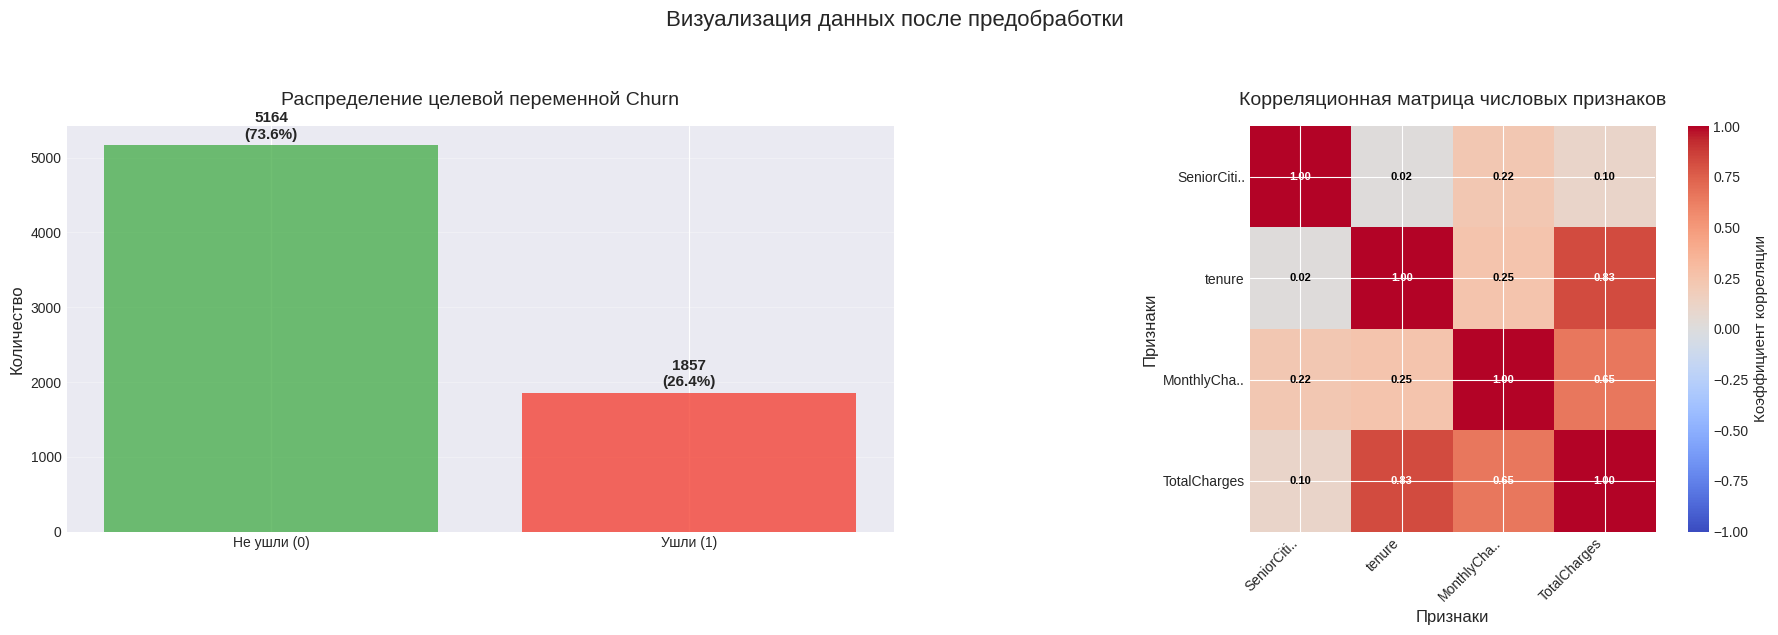

 X.shape: (7021, 19)
 y.shape: (7021,)
 Распределение классов: {0: np.int64(5164), 1: np.int64(1857)}
 Доля положительного класса: 0.264

 Размер данных после предобработки: (7021, 30)

 Количество признаков после one-hot кодирования: 30


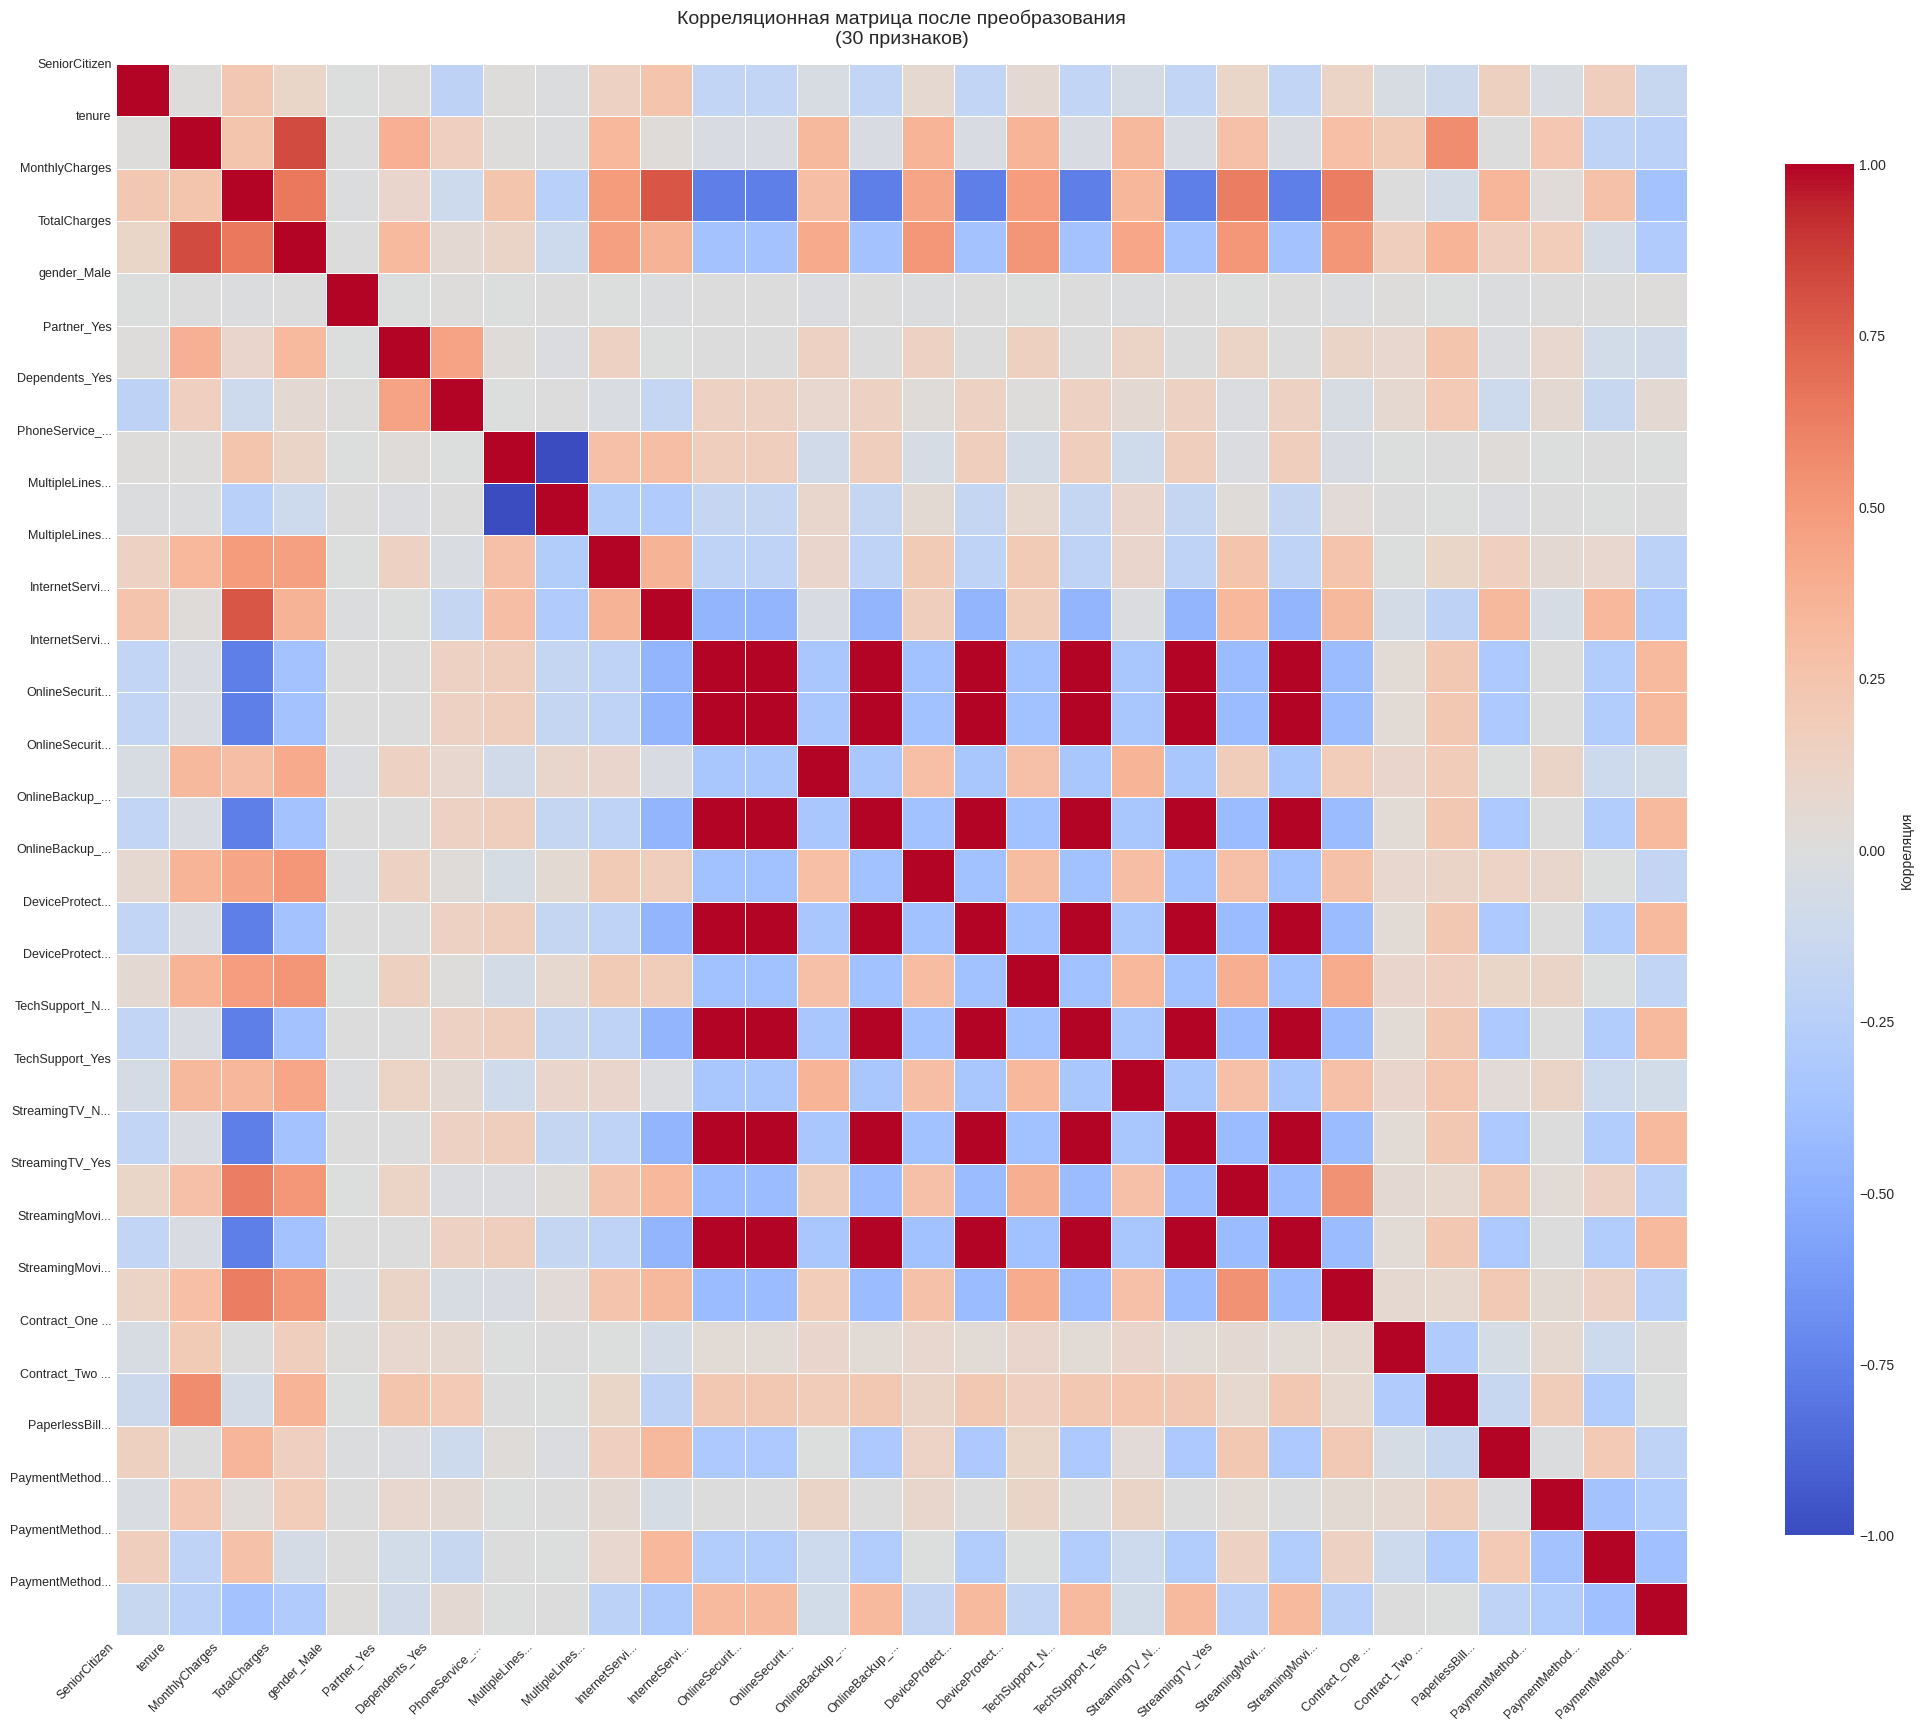


 Разделение выполнено:
 X_train: (5616, 30)
 X_test: (1405, 30)
 Y_train: (5616,) (распределение: {0: np.int64(4131), 1: np.int64(1485)})
 Y_test: (1405,) (распределение: {0: np.int64(1033), 1: np.int64(372)})
Fitting 3 folds for each of 48 candidates, totalling 144 fits

 Подбор параметров завершен
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50, 'subsample': 0.8}

 Получившиеся метрики:


,Метрика,Значение
0,Accuracy,0.797865
1,Precision,0.657143
2,Recall,0.494624
3,F1-Score,0.564417
4,ROC-AUC,0.840494


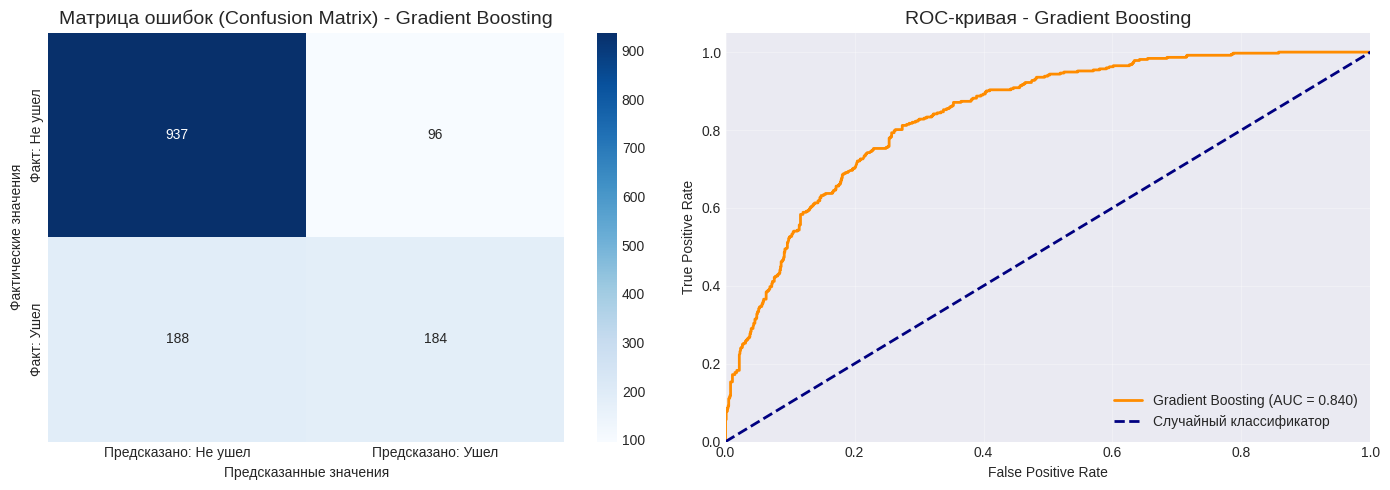

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, roc_curve, precision_recall_curve)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
df = pd.read_csv('data/data.csv')
print(f"Размер данных: {df.shape}")
print(f"\nПервые 5 строк:")
display(df.head())

print("\nИнформация о данных:")
df.info()

print("\nПроверка пропущенных значений:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])


# Выполним более широкую предподготовку
df_clean = df.copy()

# удалим id покупателя
if 'customerID' in df_clean.columns:
    df_clean = df_clean.drop('customerID', axis=1)

# обработаем TotalCharges столбец, тк он категориальный, но имеет много значений
if 'TotalCharges' in df_clean.columns:
    print("\nОбработка TotalCharges:")
    df_clean['TotalCharges'] = df_clean['TotalCharges'].astype(str).str.strip()
    df_clean['TotalCharges'] = df_clean['TotalCharges'].replace(['', ' '], np.nan)
    df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Кодируем целевую переменную
if 'Churn' in df_clean.columns:
    df_clean['Churn'] = df_clean['Churn'].map({'No': 0, 'Yes': 1})
    print(" Целевая переменная 'Churn' закодирована: No→0, Yes→1")

# Разделяем признаки по типам
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

if 'Churn' in numeric_cols:
    numeric_cols.remove('Churn')

print(f"\n Категориальные признаки ({len(categorical_cols)}): {categorical_cols}")
print(f"\n Числовые признаки ({len(numeric_cols)}): {numeric_cols}")

# почистим данные от дубликатов и NaN
initial_rows = len(df_clean)
df_clean = df_clean.dropna(subset=['Churn'])
if len(df_clean) < initial_rows:
    print(f"\n Удалено {initial_rows - len(df_clean)} строк с пропущенным Churn")

initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
if len(df_clean) < initial_rows:
    print(f"\n Удалено {initial_rows - len(df_clean)} дубликатов")

print(f"\n Итоговый размер данных: {df_clean.shape}")



# Визуализируем распределение целевой переменной и выведем матрицу корреляции имеющихся до преобразования числовых признаков
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

churn_counts = df_clean['Churn'].value_counts()
bars = axes[0].bar(['Не ушли (0)', 'Ушли (1)'], churn_counts.values,
                   color=['#4CAF50', '#F44336'], alpha=0.8)
axes[0].set_title('Распределение целевой переменной Churn', fontsize=14, pad=15)
axes[0].set_ylabel('Количество', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    percentage = height / len(df_clean) * 100
    axes[0].text(bar.get_x() + bar.get_width()/2., height + max(churn_counts.values)*0.01,
                 f'{int(height)}\n({percentage:.1f}%)',
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

if len(numeric_cols) > 1:
    correlation_matrix = df_clean[numeric_cols].corr()

    im = axes[1].imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    axes[1].set_title('Корреляционная матрица числовых признаков', fontsize=14, pad=15)
    axes[1].set_xlabel('Признаки', fontsize=12)
    axes[1].set_ylabel('Признаки', fontsize=12)

    axes[1].set_xticks(range(len(numeric_cols)))
    axes[1].set_yticks(range(len(numeric_cols)))

    labels = []
    for col in numeric_cols:
        if len(col) > 12:
            labels.append(col[:10] + '..')
        else:
            labels.append(col)

    axes[1].set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
    axes[1].set_yticklabels(labels, fontsize=10)

    cbar = plt.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)
    cbar.set_label('Коэффициент корреляции', fontsize=11)

    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            corr_value = correlation_matrix.iloc[i, j]
            color = 'white' if abs(corr_value) > 0.5 else 'black'
            axes[1].text(j, i, f'{corr_value:.2f}',
                         ha='center', va='center',
                         color=color, fontsize=8, fontweight='bold')

else:
    axes[1].text(0.5, 0.5, 'Недостаточно числовых признаков\nдля корреляционного анализа',
                 ha='center', va='center', fontsize=12)
    axes[1].set_title('Корреляционная матрица', fontsize=14)

plt.suptitle('Визуализация данных после предобработки', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


# преобразуем категориальные признаки в числовые, посмотрим на корреляционную матрицу теперь
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

print(f" X.shape: {X.shape}")
print(f" y.shape: {y.shape}")
print(f" Распределение классов: {dict(y.value_counts())}")
print(f" Доля положительного класса: {y.mean():.3f}")


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_processed = preprocessor.fit_transform(X)
print(f"\n Размер данных после предобработки: {X_processed.shape}")

feature_names = []

feature_names.extend(numeric_cols)

if categorical_cols:
    onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    for i, col in enumerate(categorical_cols):
        categories = onehot_encoder.categories_[i]
        for cat in categories[1:]:
            feature_names.append(f"{col}_{cat}")

print(f"\n Количество признаков после one-hot кодирования: {len(feature_names)}")

X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

if len(feature_names) > 1:

    corr_matrix = X_processed_df.corr()
    features_to_show = feature_names

    plt.figure(figsize=(max(12, len(features_to_show)*0.7), max(10, len(features_to_show)*0.6)))

    sns.heatmap(corr_matrix, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8, "label": "Корреляция"},
                annot=False)

    plt.title(f'Корреляционная матрица после преобразования\n({len(features_to_show)} признаков)',
              fontsize=14, pad=15)

    labels = []
    for col in features_to_show:
        if len(col) > 15:
            labels.append(col[:13] + '...')
        else:
            labels.append(col)

    plt.xticks(range(len(labels)), labels, rotation=45, ha='right', fontsize=9)
    plt.yticks(range(len(labels)), labels, fontsize=9)

    plt.tight_layout()
    plt.show()



# Разделим данные на обучающую и тестовую выборки

X_train, X_test, y_train, y_test = train_test_split(
    X_processed,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\n Разделение выполнено:")
print(f" X_train: {X_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_train: {y_train.shape} (распределение: {dict(y_train.value_counts())})")
print(f" Y_test: {y_test.shape} (распределение: {dict(y_test.value_counts())})")



# создадим и обучим классификатор на бустинге
gb_classifier = GradientBoostingClassifier(random_state=42)

# определим сетку параметров для обучения модели градиентного бустинга
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 0.85],
    'max_features': ['sqrt']
}

# используем кросс-валидацию для подбора параметров из сетки
grid_search = GridSearchCV(
    estimator=gb_classifier,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1,
    error_score='raise'
)

grid_search.fit(X_train, y_train)

# посмотрим на подобранные параметры
print("\n Подбор параметров завершен")
print(f"Лучшие параметры: {grid_search.best_params_}")

# обучим модель с лучшими параметрами
best_gb = grid_search.best_estimator_
best_gb.fit(X_train, y_train)

# оценим модель стандартными метриками
y_pred = best_gb.predict(X_test)
y_pred_proba = best_gb.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics_df = pd.DataFrame({
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Значение': [accuracy, precision, recall, f1, roc_auc]
})

print("\n Получившиеся метрики:")
display(metrics_df)

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Предсказано: Не ушел', 'Предсказано: Ушел'],
            yticklabels=['Факт: Не ушел', 'Факт: Ушел'])
ax1.set_title('Матрица ошибок (Confusion Matrix) - Gradient Boosting', fontsize=14)
ax1.set_ylabel('Фактические значения')
ax1.set_xlabel('Предсказанные значения')

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'Gradient Boosting (AUC = {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайный классификатор')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC-кривая - Gradient Boosting', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Обучим имплиментированный классификатор на градиентном бустинге на улучшенном бейзлайне, посмотрим метрики

Размер данных: (7043, 21)

Первые 5 строк:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

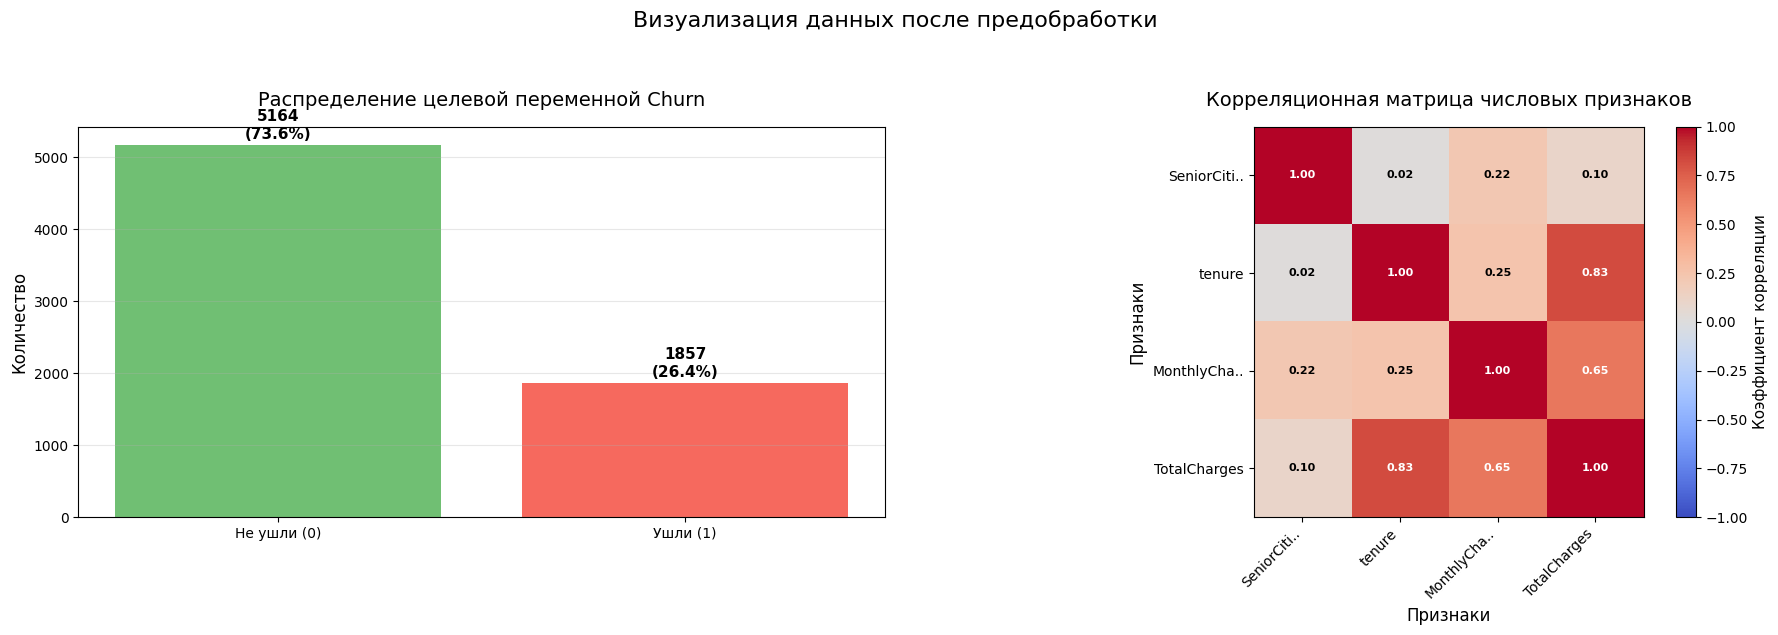

 X.shape: (7021, 19)
 y.shape: (7021,)
 Распределение классов: {0: np.int64(5164), 1: np.int64(1857)}
 Доля положительного класса: 0.264

 Размер данных после предобработки: (7021, 30)

 Количество признаков после one-hot кодирования: 30


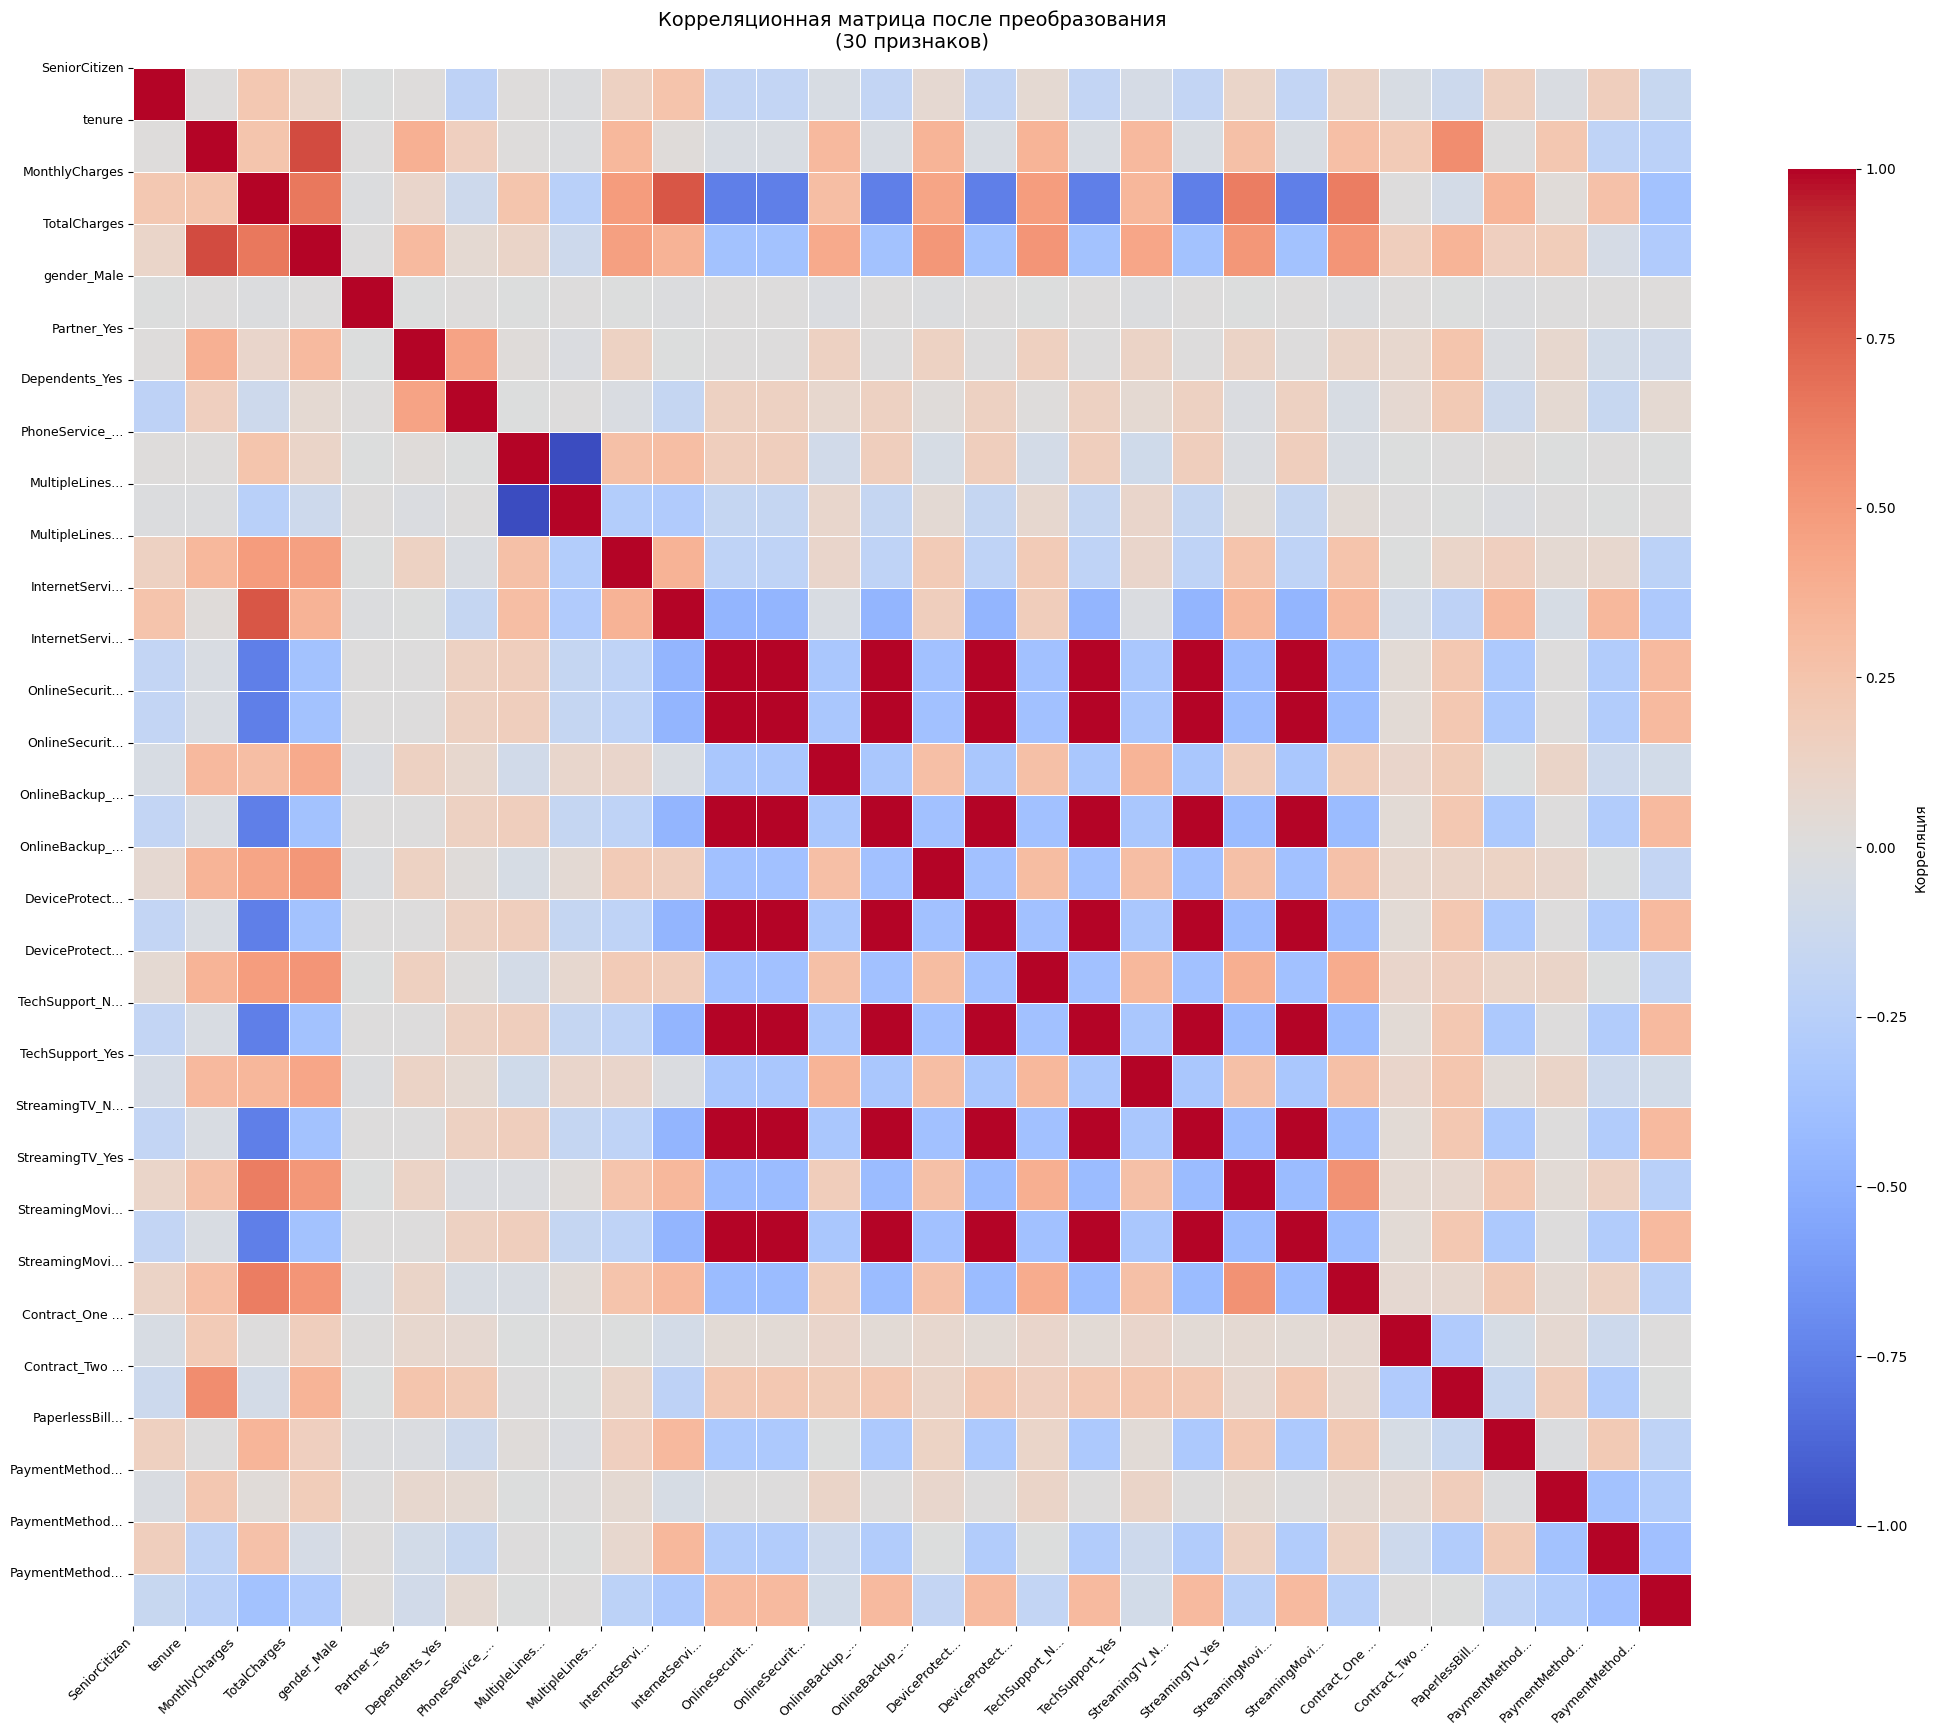


 Разделение выполнено:
 X_train: (5616, 30)
 X_test: (1405, 30)
 Y_train: (5616,) (распределение: {0: np.int64(4131), 1: np.int64(1485)})
 Y_test: (1405,) (распределение: {0: np.int64(1033), 1: np.int64(372)})

Обучение завершено
Предсказания сделаны

Получившиеся метрики:


,Метрика,Значение
0,Accuracy,0.800712
1,Precision,0.661972
2,Recall,0.505376
3,F1-Score,0.573171
4,ROC-AUC,0.841784


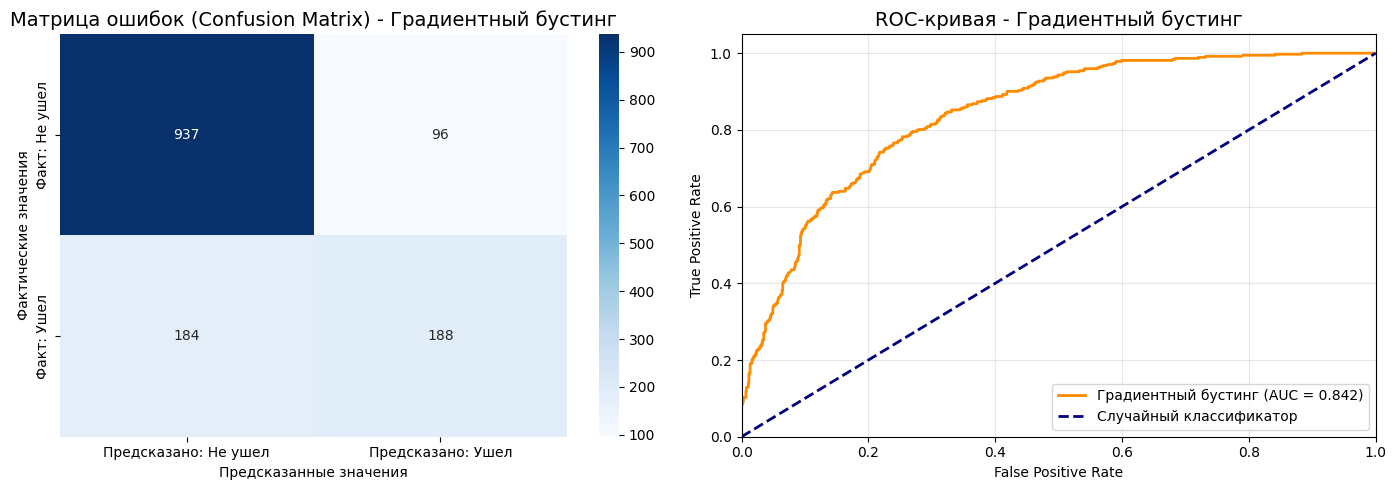

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, roc_curve, precision_recall_curve)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

import numpy as np

#имплиментированный класификатор
class MyGradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3,
                 min_samples_split=2, subsample=1.0, random_state=42):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.subsample = subsample
        self.random_state = random_state
        self.trees = []
        self.initial_prediction = None
        self.classes_ = None
        self.n_features_ = None

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -250, 250)))

    def _log_loss_gradient(self, y_true, y_pred_log_odds):
        p = self._sigmoid(y_pred_log_odds)
        return p - y_true

    def _log_loss_hessian(self, y_true, y_pred_log_odds):
        p = self._sigmoid(y_pred_log_odds)
        return p * (1 - p)

    class RegressionTree:
        def __init__(self, max_depth=3, min_samples_split=2):
            self.max_depth = max_depth
            self.min_samples_split = min_samples_split
            self.tree = None

        def _calculate_mse(self, y):
            if len(y) == 0:
                return 0
            return np.var(y)

        def _find_best_split(self, X, gradients, hessians):
            best_gain = -1
            best_feature = None
            best_threshold = None

            n_samples, n_features = X.shape

            G = np.sum(gradients)
            H = np.sum(hessians)

            for feature_idx in range(n_features):
                feature_values = X[:, feature_idx]
                sorted_indices = np.argsort(feature_values)
                sorted_features = feature_values[sorted_indices]
                sorted_gradients = gradients[sorted_indices]
                sorted_hessians = hessians[sorted_indices]

                if sorted_features[0] == sorted_features[-1]:
                    continue

                G_left = 0
                H_left = 0

                for i in range(1, len(sorted_features)):
                    if sorted_features[i] == sorted_features[i-1]:
                        G_left += sorted_gradients[i-1]
                        H_left += sorted_hessians[i-1]
                        continue

                    G_left += sorted_gradients[i-1]
                    H_left += sorted_hessians[i-1]
                    G_right = G - G_left
                    H_right = H - H_left

                    if i < self.min_samples_split or (n_samples - i) < self.min_samples_split:
                        continue

                    gain_left = G_left**2 / (H_left + 1e-6) if H_left > 0 else 0
                    gain_right = G_right**2 / (H_right + 1e-6) if H_right > 0 else 0
                    gain_total = G**2 / (H + 1e-6) if H > 0 else 0

                    gain = gain_left + gain_right - gain_total

                    if gain > best_gain:
                        best_gain = gain
                        best_feature = feature_idx
                        best_threshold = (sorted_features[i-1] + sorted_features[i]) / 2

            return best_feature, best_threshold, best_gain

        def _build_tree(self, X, gradients, hessians, depth):
            n_samples = len(gradients)

            if (depth >= self.max_depth or
                n_samples < 2 * self.min_samples_split or
                np.abs(np.sum(gradients)) < 1e-6):

                leaf_value = -np.sum(gradients) / (np.sum(hessians) + 1e-6)
                return {'type': 'leaf', 'value': leaf_value}

            best_feature, best_threshold, best_gain = self._find_best_split(X, gradients, hessians)

            if best_feature is None or best_gain < 1e-6:
                leaf_value = -np.sum(gradients) / (np.sum(hessians) + 1e-6)
                return {'type': 'leaf', 'value': leaf_value}

            left_mask = X[:, best_feature] <= best_threshold
            right_mask = X[:, best_feature] > best_threshold

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                leaf_value = -np.sum(gradients) / (np.sum(hessians) + 1e-6)
                return {'type': 'leaf', 'value': leaf_value}

            left_subtree = self._build_tree(X[left_mask], gradients[left_mask],
                                           hessians[left_mask], depth + 1)
            right_subtree = self._build_tree(X[right_mask], gradients[right_mask],
                                            hessians[right_mask], depth + 1)

            node = {
                'type': 'node',
                'feature': best_feature,
                'threshold': best_threshold,
                'left': left_subtree,
                'right': right_subtree
            }

            return node

        def _predict_single(self, x, node):
            if node['type'] == 'leaf':
                return node['value']

            if x[node['feature']] <= node['threshold']:
                return self._predict_single(x, node['left'])
            else:
                return self._predict_single(x, node['right'])

        def fit(self, X, gradients, hessians):
            X = np.array(X, dtype=np.float64)
            gradients = np.array(gradients, dtype=np.float64)
            hessians = np.array(hessians, dtype=np.float64)

            self.tree = self._build_tree(X, gradients, hessians, depth=0)
            return self

        def predict(self, X):
            X = np.array(X, dtype=np.float64)
            predictions = []

            for i in range(X.shape[0]):
                pred = self._predict_single(X[i], self.tree)
                predictions.append(pred)

            return np.array(predictions)

    def fit(self, X, y):
        np.random.seed(self.random_state)
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)

        self.n_features_ = X.shape[1]
        self.classes_ = np.unique(y)

        pos_class_ratio = np.mean(y)
        eps = 1e-8
        pos_class_ratio = np.clip(pos_class_ratio, eps, 1 - eps)
        self.initial_prediction = np.log(pos_class_ratio / (1 - pos_class_ratio))

        current_log_odds = np.full(X.shape[0], self.initial_prediction)

        self.trees = []

        for i in range(self.n_estimators):
            gradients = self._log_loss_gradient(y, current_log_odds)
            hessians = self._log_loss_hessian(y, current_log_odds)

            if self.subsample < 1.0:
                n_samples = X.shape[0]
                subsample_size = int(self.subsample * n_samples)
                indices = np.random.choice(n_samples, subsample_size, replace=False)
                X_subsample = X[indices]
                gradients_subsample = gradients[indices]
                hessians_subsample = hessians[indices]
            else:
                X_subsample = X
                gradients_subsample = gradients
                hessians_subsample = hessians

            tree = self.RegressionTree(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )
            tree.fit(X_subsample, gradients_subsample, hessians_subsample)

            tree_predictions = tree.predict(X)

            current_log_odds += self.learning_rate * tree_predictions

            self.trees.append(tree)

            if (i + 1) % 10 == 0 or i == 0 or i == self.n_estimators - 1:
                current_proba = self._sigmoid(current_log_odds)
                current_pred = (current_proba >= 0.5).astype(int)
                train_accuracy = accuracy_score(y, current_pred)

                epsilon = 1e-15
                p = np.clip(current_proba, epsilon, 1 - epsilon)
                log_loss = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

        return self

    def predict_proba(self, X):
        X = np.array(X, dtype=np.float64)
        n_samples = X.shape[0]

        log_odds = np.full(n_samples, self.initial_prediction)

        for tree in self.trees:
            log_odds += self.learning_rate * tree.predict(X)

        proba_positive = self._sigmoid(log_odds)
        proba_negative = 1 - proba_positive

        return np.column_stack([proba_negative, proba_positive])

    def predict(self, X, threshold=0.5):
        proba = self.predict_proba(X)
        return (proba[:, 1] >= threshold).astype(int)

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)




# Загрузка данных
df = pd.read_csv('data/data.csv')
print(f"Размер данных: {df.shape}")
print(f"\nПервые 5 строк:")
display(df.head())

print("\nИнформация о данных:")
df.info()

print("\nПроверка пропущенных значений:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])


# Выполним более широкую предподготовку
df_clean = df.copy()

# удалим id покупателя
if 'customerID' in df_clean.columns:
    df_clean = df_clean.drop('customerID', axis=1)

# обработаем TotalCharges столбец, тк он категориальный, но имеет много значений
if 'TotalCharges' in df_clean.columns:
    print("\nОбработка TotalCharges:")
    df_clean['TotalCharges'] = df_clean['TotalCharges'].astype(str).str.strip()
    df_clean['TotalCharges'] = df_clean['TotalCharges'].replace(['', ' '], np.nan)
    df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Кодируем целевую переменную
if 'Churn' in df_clean.columns:
    df_clean['Churn'] = df_clean['Churn'].map({'No': 0, 'Yes': 1})
    print(" Целевая переменная 'Churn' закодирована: No→0, Yes→1")

# Разделяем признаки по типам
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

if 'Churn' in numeric_cols:
    numeric_cols.remove('Churn')

print(f"\n Категориальные признаки ({len(categorical_cols)}): {categorical_cols}")
print(f"\n Числовые признаки ({len(numeric_cols)}): {numeric_cols}")

# почистим данные от дубликатов и NaN
initial_rows = len(df_clean)
df_clean = df_clean.dropna(subset=['Churn'])
if len(df_clean) < initial_rows:
    print(f"\n Удалено {initial_rows - len(df_clean)} строк с пропущенным Churn")

initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
if len(df_clean) < initial_rows:
    print(f"\n Удалено {initial_rows - len(df_clean)} дубликатов")

print(f"\n Итоговый размер данных: {df_clean.shape}")



# Визуализируем распределение целевой переменной и выведем матрицу корреляции имеющихся до преобразования числовых признаков
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

churn_counts = df_clean['Churn'].value_counts()
bars = axes[0].bar(['Не ушли (0)', 'Ушли (1)'], churn_counts.values,
                   color=['#4CAF50', '#F44336'], alpha=0.8)
axes[0].set_title('Распределение целевой переменной Churn', fontsize=14, pad=15)
axes[0].set_ylabel('Количество', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    percentage = height / len(df_clean) * 100
    axes[0].text(bar.get_x() + bar.get_width()/2., height + max(churn_counts.values)*0.01,
                 f'{int(height)}\n({percentage:.1f}%)',
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

if len(numeric_cols) > 1:
    correlation_matrix = df_clean[numeric_cols].corr()

    im = axes[1].imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    axes[1].set_title('Корреляционная матрица числовых признаков', fontsize=14, pad=15)
    axes[1].set_xlabel('Признаки', fontsize=12)
    axes[1].set_ylabel('Признаки', fontsize=12)

    axes[1].set_xticks(range(len(numeric_cols)))
    axes[1].set_yticks(range(len(numeric_cols)))

    labels = []
    for col in numeric_cols:
        if len(col) > 12:
            labels.append(col[:10] + '..')
        else:
            labels.append(col)

    axes[1].set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
    axes[1].set_yticklabels(labels, fontsize=10)

    cbar = plt.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)
    cbar.set_label('Коэффициент корреляции', fontsize=11)

    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            corr_value = correlation_matrix.iloc[i, j]
            color = 'white' if abs(corr_value) > 0.5 else 'black'
            axes[1].text(j, i, f'{corr_value:.2f}',
                         ha='center', va='center',
                         color=color, fontsize=8, fontweight='bold')

else:
    axes[1].text(0.5, 0.5, 'Недостаточно числовых признаков\nдля корреляционного анализа',
                 ha='center', va='center', fontsize=12)
    axes[1].set_title('Корреляционная матрица', fontsize=14)

plt.suptitle('Визуализация данных после предобработки', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


# преобразуем категориальные признаки в числовые, посмотрим на корреляционную матрицу теперь
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

print(f" X.shape: {X.shape}")
print(f" y.shape: {y.shape}")
print(f" Распределение классов: {dict(y.value_counts())}")
print(f" Доля положительного класса: {y.mean():.3f}")


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_processed = preprocessor.fit_transform(X)
print(f"\n Размер данных после предобработки: {X_processed.shape}")

feature_names = []

feature_names.extend(numeric_cols)

if categorical_cols:
    onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    for i, col in enumerate(categorical_cols):
        categories = onehot_encoder.categories_[i]
        for cat in categories[1:]:
            feature_names.append(f"{col}_{cat}")

print(f"\n Количество признаков после one-hot кодирования: {len(feature_names)}")

X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

if len(feature_names) > 1:

    corr_matrix = X_processed_df.corr()
    features_to_show = feature_names

    plt.figure(figsize=(max(12, len(features_to_show)*0.7), max(10, len(features_to_show)*0.6)))

    sns.heatmap(corr_matrix, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8, "label": "Корреляция"},
                annot=False)

    plt.title(f'Корреляционная матрица после преобразования\n({len(features_to_show)} признаков)',
              fontsize=14, pad=15)

    labels = []
    for col in features_to_show:
        if len(col) > 15:
            labels.append(col[:13] + '...')
        else:
            labels.append(col)

    plt.xticks(range(len(labels)), labels, rotation=45, ha='right', fontsize=9)
    plt.yticks(range(len(labels)), labels, fontsize=9)

    plt.tight_layout()
    plt.show()



# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_processed,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\n Разделение выполнено:")
print(f" X_train: {X_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_train: {y_train.shape} (распределение: {dict(y_train.value_counts())})")
print(f" Y_test: {y_test.shape} (распределение: {dict(y_test.value_counts())})")



# возьмем самые оптимальные параметры модели c кросс-валидации модели sklearn, обучим ее и выполним предсказания
my_gb = MyGradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, min_samples_split=2, subsample=0.8, random_state=42)

my_gb.fit(X_train, y_train)
print("\nОбучение завершено")

y_pred = my_gb.predict(X_test)
y_pred_proba = my_gb.predict_proba(X_test)[:, 1]
print("Предсказания сделаны")

# Оцениваем метрики
accuracy_gb = accuracy_score(y_test, y_pred)
precision_gb = precision_score(y_test, y_pred)
recall_gb = recall_score(y_test, y_pred)
f1_gb = f1_score(y_test, y_pred)
roc_auc_gb = roc_auc_score(y_test, y_pred_proba)

metrics_df_gb = pd.DataFrame({
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Значение': [accuracy_gb, precision_gb, recall_gb, f1_gb, roc_auc_gb]
})

print("\nПолучившиеся метрики:")
display(metrics_df_gb)

# Матрица ошибок
cm_gb = confusion_matrix(y_test, y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Предсказано: Не ушел', 'Предсказано: Ушел'],
            yticklabels=['Факт: Не ушел', 'Факт: Ушел'])
ax1.set_title('Матрица ошибок (Confusion Matrix) - Градиентный бустинг', fontsize=14)
ax1.set_ylabel('Фактические значения')
ax1.set_xlabel('Предсказанные значения')

# ROC-кривая
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba)
ax2.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'Градиентный бустинг (AUC = {roc_auc_gb:.3f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайный классификатор')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC-кривая - Градиентный бустинг', fontsize=14)
ax2.legend(loc="lower right")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Все варианты моделей на всех датасетах показали примерно одинаковые результаты. Однако кроме высокой эффективности имплиментированного классификатора, это можент также указывать и на переобучение модели, а также на простоту выборки.**





**Теперь решаем задачу регрессии с датасетами data/linear/train_energy_data.csv и data/linear/test_energy_data.csv, то есть сразу имеем разделение на тестовую и обучающие выборки**

Обучим модель регрессии на градиентном бустинге, используя безлайны без сильной обработки выборок и оценим точности предсказания с помощью основных метрик.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor

# Загрузим данные (датасет для регрессии сразу разделен на тестовую и обучающие выборки)
train_df = pd.read_csv('data/linear/train_energy_data.csv')
test_df = pd.read_csv('data/linear/test_energy_data.csv')

print(f"Размер обучающей выборки: {train_df.shape}")
print(f"Размер тестовой выборки: {test_df.shape}")
print("\nПервые 5 строк обучающей выборки:")
display(train_df.head())
print("\nПервые 5 строк тестовой выборки:")
display(test_df.head())

print("\nИнформация о данных (обучающая выборка):")
train_df.info()

# проверим на пропущенные значения
print("Проверка на пропущенные значения:")
print("Обучающая выборка:")
print(train_df.isnull().sum())
print("\nТестовая выборка:")
print(test_df.isnull().sum())

train_clean = train_df.copy()
test_clean = test_df.copy()

# Удалим категориальные признаки
categorical_cols = ['Building Type', 'Day of Week']
train_clean = train_clean.drop(categorical_cols, axis=1, errors='ignore')
test_clean = test_clean.drop(categorical_cols, axis=1, errors='ignore')

print(f" Обучающая выборка после обработки: {train_clean.shape}")
print(f" Тестовая выборка после обработки: {test_clean.shape}")

# Разделяем на признаки и целевую переменную
X_train = train_clean.drop('Energy Consumption', axis=1)
y_train = train_clean['Energy Consumption']

X_test = test_clean.drop('Energy Consumption', axis=1)
y_test = test_clean['Energy Consumption']

print(f" X_train: {X_train.shape}")
print(f" Y_train: {y_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_test: {y_test.shape}")

# Создаем и обучаем модель для регрессии
gb_regressor = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    subsample=0.8,
    max_features='sqrt',
    random_state=42,
    loss='squared_error'
)

# Обучаем модель
gb_regressor.fit(X_train, y_train)

print("\nМодель обучена")

# Делаем предсказания
y_pred_train = gb_regressor.predict(X_train)
y_pred_test = gb_regressor.predict(X_test)

print("Предсказания сделаны")

def calculate_regression_metrics(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    return {
        'Набор данных': dataset_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAPE (%)': mape * 100
    }

metrics_train = calculate_regression_metrics(y_train, y_pred_train, 'Обучающая выборка')
metrics_test = calculate_regression_metrics(y_test, y_pred_test, 'Тестовая выборка')

# Создаем DataFrame с метриками
metrics_df = pd.DataFrame({
    'Метрика': ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE (%)'],
    'Обучающая выборка': [metrics_train['MAE'], metrics_train['MSE'], metrics_train['RMSE'],
                         metrics_train['R²'], metrics_train['MAPE (%)']],
    'Тестовая выборка': [metrics_test['MAE'], metrics_test['MSE'], metrics_test['RMSE'],
                        metrics_test['R²'], metrics_test['MAPE (%)']]
})

print("\nМЕТРИКИ КАЧЕСТВА МОДЕЛИ:")
display(metrics_df)

Размер обучающей выборки: (1000, 7)
Размер тестовой выборки: (100, 7)

Первые 5 строк обучающей выборки:


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17



Первые 5 строк тестовой выборки:


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59



Информация о данных (обучающая выборка):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB
Проверка на пропущенные значения:
Обучающая выборка:
Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

Тестовая выборка:
Building Type          0
Square Footage         0
Number of Occupants    0
Appli

,Метрика,Обучающая выборка,Тестовая выборка
0,MAE,211.115710,378.311427
1,MSE,63866.484484,188528.793794
2,RMSE,252.718192,434.199026
3,R²,0.926607,0.725267
4,MAPE (%),5.353414,9.737801


Имплиментируем регрессор на градиентном бустинге и обучим его на бейзлайне


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

#имплиментированный регрессор
class MyGradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3,
                 min_samples_split=2, subsample=1.0, random_state=42):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.subsample = subsample
        self.random_state = random_state
        self.trees = []
        self.initial_prediction = None
        self.n_features_ = None

    class RegressionTree:
        def __init__(self, max_depth=3, min_samples_split=2):
            self.max_depth = max_depth
            self.min_samples_split = min_samples_split
            self.tree = None

        def _calculate_mse(self, y):
            if len(y) == 0:
                return 0
            return np.var(y)

        def _find_best_split(self, X, residuals):
            best_mse_reduction = -1
            best_feature = None
            best_threshold = None

            n_samples, n_features = X.shape

            for feature_idx in range(n_features):
                feature_values = np.unique(X[:, feature_idx])

                if len(feature_values) <= 1:
                    continue

                percentiles = np.linspace(10, 90, min(10, len(feature_values)))
                thresholds = np.percentile(feature_values, percentiles)

                for threshold in thresholds:
                    if threshold == feature_values.min() or threshold == feature_values.max():
                        continue

                    left_mask = X[:, feature_idx] <= threshold
                    right_mask = X[:, feature_idx] > threshold

                    if np.sum(left_mask) < self.min_samples_split or np.sum(right_mask) < self.min_samples_split:
                        continue

                    left_residuals = residuals[left_mask]
                    right_residuals = residuals[right_mask]

                    total_mse = np.var(residuals) if len(residuals) > 0 else 0
                    left_mse = np.var(left_residuals) if len(left_residuals) > 0 else 0
                    right_mse = np.var(right_residuals) if len(right_residuals) > 0 else 0

                    weight_left = len(left_residuals) / n_samples
                    weight_right = len(right_residuals) / n_samples

                    mse_reduction = total_mse - (weight_left * left_mse + weight_right * right_mse)

                    if mse_reduction > best_mse_reduction:
                        best_mse_reduction = mse_reduction
                        best_feature = feature_idx
                        best_threshold = threshold

            return best_feature, best_threshold, best_mse_reduction

        def _build_tree(self, X, residuals, depth):
            n_samples = len(residuals)

            if depth >= self.max_depth or n_samples < 2 * self.min_samples_split or np.std(residuals) < 1e-6:
                leaf_value = np.mean(residuals) if len(residuals) > 0 else 0
                return {'type': 'leaf', 'value': leaf_value}

            best_feature, best_threshold, best_mse_reduction = self._find_best_split(X, residuals)

            if best_feature is None or best_mse_reduction < 1e-6:
                leaf_value = np.mean(residuals) if len(residuals) > 0 else 0
                return {'type': 'leaf', 'value': leaf_value}

            left_mask = X[:, best_feature] <= best_threshold
            right_mask = X[:, best_feature] > best_threshold

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                leaf_value = np.mean(residuals) if len(residuals) > 0 else 0
                return {'type': 'leaf', 'value': leaf_value}

            left_subtree = self._build_tree(X[left_mask], residuals[left_mask], depth + 1)
            right_subtree = self._build_tree(X[right_mask], residuals[right_mask], depth + 1)

            node = {
                'type': 'node',
                'feature': best_feature,
                'threshold': best_threshold,
                'left': left_subtree,
                'right': right_subtree
            }

            return node

        def _predict_single(self, x, node):
            if node['type'] == 'leaf':
                return node['value']

            if x[node['feature']] <= node['threshold']:
                return self._predict_single(x, node['left'])
            else:
                return self._predict_single(x, node['right'])

        def fit(self, X, residuals):
            X = np.array(X, dtype=np.float64)
            residuals = np.array(residuals, dtype=np.float64)

            self.tree = self._build_tree(X, residuals, depth=0)
            return self

        def predict(self, X):
            X = np.array(X, dtype=np.float64)
            predictions = []

            for i in range(X.shape[0]):
                pred = self._predict_single(X[i], self.tree)
                predictions.append(pred)

            return np.array(predictions)

    def _gradient_mse(self, y_true, y_pred):
        return 2 * (y_pred - y_true)

    def fit(self, X, y):
        np.random.seed(self.random_state)
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)

        self.n_features_ = X.shape[1]

        self.initial_prediction = np.mean(y)

        current_predictions = np.full(X.shape[0], self.initial_prediction)

        self.trees = []

        for i in range(self.n_estimators):
            residuals = self._gradient_mse(y, current_predictions)

            if self.subsample < 1.0:
                n_samples = X.shape[0]
                subsample_size = int(self.subsample * n_samples)
                indices = np.random.choice(n_samples, subsample_size, replace=False)
                X_subsample = X[indices]
                residuals_subsample = residuals[indices]
            else:
                X_subsample = X
                residuals_subsample = residuals

            tree = self.RegressionTree(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )
            tree.fit(X_subsample, residuals_subsample)

            tree_predictions = tree.predict(X)

            current_predictions -= self.learning_rate * tree_predictions

            self.trees.append(tree)

            if (i + 1) % 20 == 0 or i == 0 or i == self.n_estimators - 1:
                train_mse = mean_squared_error(y, current_predictions)
                train_mae = mean_absolute_error(y, current_predictions)
                train_r2 = r2_score(y, current_predictions)

        return self

    def predict(self, X):
        X = np.array(X, dtype=np.float64)
        n_samples = X.shape[0]

        predictions = np.full(n_samples, self.initial_prediction)

        for tree in self.trees:
            predictions -= self.learning_rate * tree.predict(X)

        return predictions

# Загрузим данные (датасет для регрессии сразу разделен на тестовую и обучающие выборки)
train_df = pd.read_csv('data/linear/train_energy_data.csv')
test_df = pd.read_csv('data/linear/test_energy_data.csv')

print(f"Размер обучающей выборки: {train_df.shape}")
print(f"Размер тестовой выборки: {test_df.shape}")
print("\nПервые 5 строк обучающей выборки:")
display(train_df.head())
print("\nПервые 5 строк тестовой выборки:")
display(test_df.head())

print("\nИнформация о данных (обучающая выборка):")
train_df.info()

# проверим на пропущенные значения
print("Проверка на пропущенные значения:")
print("Обучающая выборка:")
print(train_df.isnull().sum())
print("\nТестовая выборка:")
print(test_df.isnull().sum())

train_clean = train_df.copy()
test_clean = test_df.copy()

# Удалим категориальные признаки
categorical_cols = ['Building Type', 'Day of Week']
train_clean = train_clean.drop(categorical_cols, axis=1, errors='ignore')
test_clean = test_clean.drop(categorical_cols, axis=1, errors='ignore')

print(f" Обучающая выборка после обработки: {train_clean.shape}")
print(f" Тестовая выборка после обработки: {test_clean.shape}")

# Разделяем на признаки и целевую переменную
X_train = train_clean.drop('Energy Consumption', axis=1)
y_train = train_clean['Energy Consumption']

X_test = test_clean.drop('Energy Consumption', axis=1)
y_test = test_clean['Energy Consumption']

print(f" X_train: {X_train.shape}")
print(f" Y_train: {y_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_test: {y_test.shape}")

# создаем и обучаем имплиментированную модель градиентного бустинга для регрессии
gb_regressor = MyGradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=2,
    subsample=0.8,
    random_state=42
)
gb_regressor.fit(X_train.values, y_train.values)

print("\nМодель обучена")

# Делаем предсказания
y_pred_train = gb_regressor.predict(X_train.values)
y_pred_test = gb_regressor.predict(X_test.values)

print("Предсказания сделаны")

def calculate_regression_metrics(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    return {
        'Набор данных': dataset_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAPE (%)': mape * 100
    }

metrics_train = calculate_regression_metrics(y_train, y_pred_train, 'Обучающая выборка')
metrics_test = calculate_regression_metrics(y_test, y_pred_test, 'Тестовая выборка')

metrics_df = pd.DataFrame({
    'Метрика': ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE (%)'],
    'Обучающая выборка': [metrics_train['MAE'], metrics_train['MSE'], metrics_train['RMSE'],
                         metrics_train['R²'], metrics_train['MAPE (%)']],
    'Тестовая выборка': [metrics_test['MAE'], metrics_test['MSE'], metrics_test['RMSE'],
                        metrics_test['R²'], metrics_test['MAPE (%)']]
})

print("\nМЕТРИКИ КАЧЕСТВА МОДЕЛИ:")
display(metrics_df)

Размер обучающей выборки: (1000, 7)
Размер тестовой выборки: (100, 7)

Первые 5 строк обучающей выборки:


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17



Первые 5 строк тестовой выборки:


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59



Информация о данных (обучающая выборка):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB
Проверка на пропущенные значения:
Обучающая выборка:
Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

Тестовая выборка:
Building Type          0
Square Footage         0
Number of Occupants    0
Appli

,Метрика,Обучающая выборка,Тестовая выборка
0,MAE,112.118947,418.445972
1,MSE,19985.479982,233518.384570
2,RMSE,141.370011,483.237400
3,R²,0.977034,0.659705
4,MAPE (%),2.856131,10.600023


Теперь улучшим бейзлайн для регрессора на градиентном бустинге, обучим заново модель на получившемся датасете. Применим кодирование категориальных признаков, чтобы получились правильные предсказания

Размер обучающей выборки: (1000, 7)
Размер тестовой выборки: (100, 7)

 Первые 5 строк обучающей выборки:


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17



 Информация о данных (обучающая выборка):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB

 Проверка пропущенных значений:
Обучающая выборка:
Series([], dtype: int64)

Тестовая выборка:
Series([], dtype: int64)

 Категориальные признаки (2): ['Building Type', 'Day of Week']

 Числовые признаки (4): ['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature']

 X_train: (1000, 6)
 Y_train: (1000,)
 X_tes

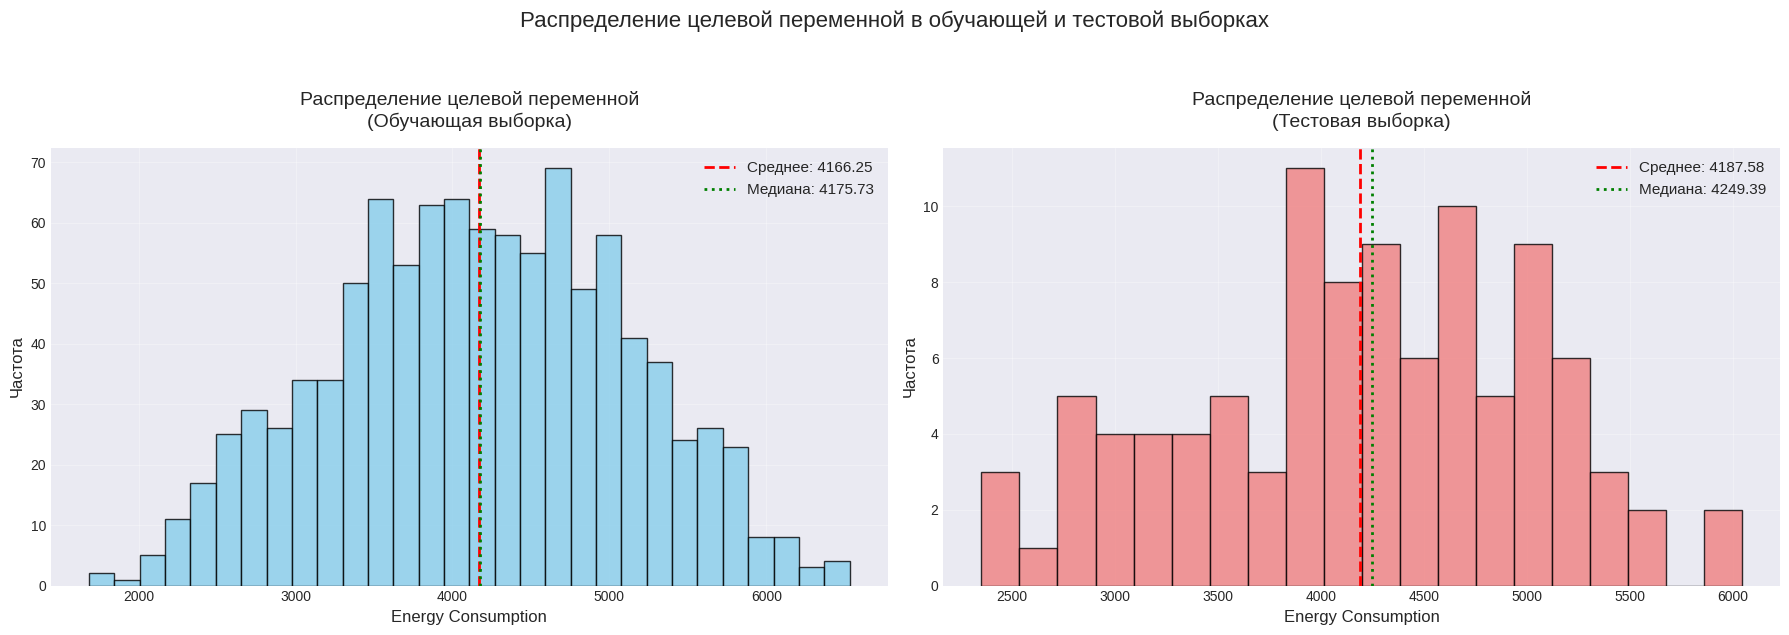

 Размер обучающих данных после предобработки: (1000, 7)
 Размер тестовых данных после предобработки: (100, 7)

 Количество признаков после one-hot кодирования: 7


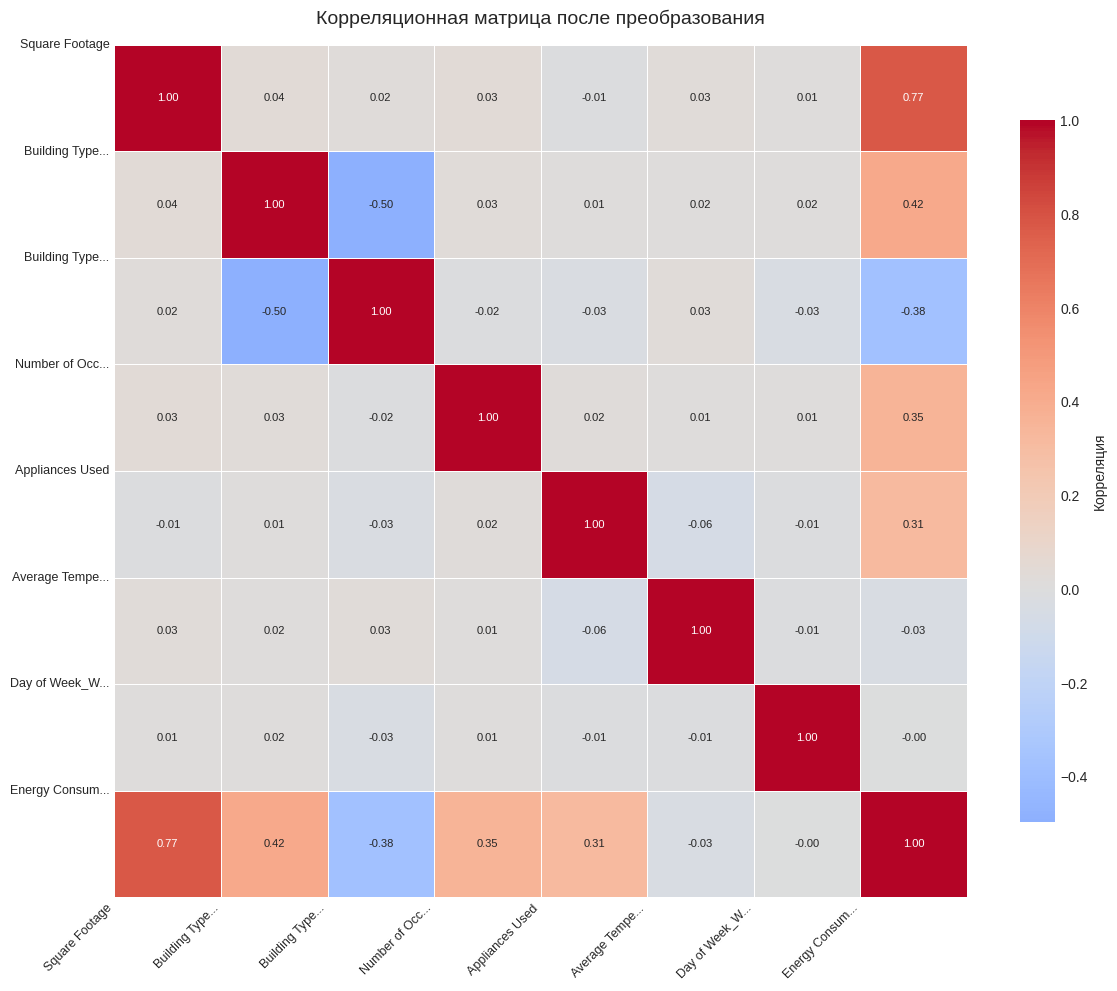

Fitting 3 folds for each of 128 candidates, totalling 384 fits

Подбор параметров для Gradient Boosting завершен
Лучшие параметры для модели: {'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}

Модель обучена
Предсказания сделаны

МЕТРИКИ КАЧЕСТВА МОДЕЛИ:


,Метрика,Обучающая выборка,Тестовая выборка
0,MAE,18.867040,55.797772
1,MSE,586.112072,5089.930703
2,RMSE,24.209752,71.343750
3,R²,0.999326,0.992583
4,MAPE (%),0.478539,1.387467


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                           r2_score, mean_absolute_percentage_error)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


# Загрузка данных
train_df = pd.read_csv('data/linear/train_energy_data.csv')
test_df = pd.read_csv('data/linear/test_energy_data.csv')

print(f"Размер обучающей выборки: {train_df.shape}")
print(f"Размер тестовой выборки: {test_df.shape}")
print(f"\n Первые 5 строк обучающей выборки:")
display(train_df.head())

print("\n Информация о данных (обучающая выборка):")
train_df.info()

print("\n Проверка пропущенных значений:")
missing_data_train = train_df.isnull().sum()
missing_data_test = test_df.isnull().sum()
print("Обучающая выборка:")
print(missing_data_train[missing_data_train > 0])
print("\nТестовая выборка:")
print(missing_data_test[missing_data_test > 0])



# преобразуем категориальные признаки в числовые
train_clean = train_df.copy()
test_clean = test_df.copy()

categorical_cols = train_clean.select_dtypes(include=['object']).columns.tolist()
numeric_cols = train_clean.select_dtypes(include=[np.number]).columns.tolist()

target_col = 'Energy Consumption'
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

print(f"\n Категориальные признаки ({len(categorical_cols)}): {categorical_cols}")
print(f"\n Числовые признаки ({len(numeric_cols)}): {numeric_cols}")


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


X_train = train_clean.drop(target_col, axis=1)
y_train = train_clean[target_col]

X_test = test_clean.drop(target_col, axis=1)
y_test = test_clean[target_col]

print(f"\n X_train: {X_train.shape}")
print(f" Y_train: {y_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_test: {y_test.shape}")



# посмотрим на распределение целевой переменной в обучающей и тестовых выборках
fig, axes = plt.subplots(1, 2, figsize=(18, 6))


target_values_train = train_clean[target_col]
axes[0].hist(target_values_train, bins=30, color='skyblue', edgecolor='black', alpha=0.8)
axes[0].set_title('Распределение целевой переменной\n(Обучающая выборка)', fontsize=14, pad=15)
axes[0].set_xlabel('Energy Consumption', fontsize=12)
axes[0].set_ylabel('Частота', fontsize=12)
axes[0].grid(alpha=0.3)
mean_val_train = target_values_train.mean()
median_val_train = target_values_train.median()
axes[0].axvline(mean_val_train, color='red', linestyle='--', linewidth=2,
                label=f'Среднее: {mean_val_train:.2f}')
axes[0].axvline(median_val_train, color='green', linestyle=':', linewidth=2,
                label=f'Медиана: {median_val_train:.2f}')
axes[0].legend(fontsize=11)


target_values_test = test_clean[target_col]
axes[1].hist(target_values_test, bins=20, color='lightcoral', edgecolor='black', alpha=0.8)
axes[1].set_title('Распределение целевой переменной\n(Тестовая выборка)', fontsize=14, pad=15)
axes[1].set_xlabel('Energy Consumption', fontsize=12)
axes[1].set_ylabel('Частота', fontsize=12)
axes[1].grid(alpha=0.3)
mean_val_test = target_values_test.mean()
median_val_test = target_values_test.median()
axes[1].axvline(mean_val_test, color='red', linestyle='--', linewidth=2,
                label=f'Среднее: {mean_val_test:.2f}')
axes[1].axvline(median_val_test, color='green', linestyle=':', linewidth=2,
                label=f'Медиана: {median_val_test:.2f}')
axes[1].legend(fontsize=11)

plt.suptitle('Распределение целевой переменной в обучающей и тестовой выборках',
             fontsize=16, y=1.05)
plt.tight_layout()
plt.show()



# применим преобразование, посмотрим получившуюся матрицу корреляции
X_train_processed = preprocessor.fit_transform(X_train)
print(f" Размер обучающих данных после предобработки: {X_train_processed.shape}")
X_test_processed = preprocessor.transform(X_test)
print(f" Размер тестовых данных после предобработки: {X_test_processed.shape}")

feature_names = []
feature_names.extend(numeric_cols)

if categorical_cols:
    onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    for i, col in enumerate(categorical_cols):
        categories = onehot_encoder.categories_[i]
        for cat in categories[1:]:
            feature_names.append(f"{col}_{cat}")

print(f"\n Количество признаков после one-hot кодирования: {len(feature_names)}")

X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)

if len(feature_names) > 1:
    X_train_processed_df[target_col] = y_train.values

    correlations_with_target = X_train_processed_df.corr()[target_col].drop(target_col)
    top_features = correlations_with_target.abs().sort_values(ascending=False).head(15).index.tolist()

    corr_matrix = X_train_processed_df[top_features + [target_col]].corr()

    plt.figure(figsize=(12, 10))

    sns.heatmap(corr_matrix, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8, "label": "Корреляция"},
                annot=True, fmt='.2f', annot_kws={"size": 8})

    plt.title('Корреляционная матрица после преобразования',
              fontsize=14, pad=15)

    # Форматируем подписи
    labels = []
    for col in top_features + [target_col]:
        if len(col) > 15:
            labels.append(col[:13] + '...')
        else:
            labels.append(col)

    plt.xticks(range(len(labels)), labels, rotation=45, ha='right', fontsize=9)
    plt.yticks(range(len(labels)), labels, fontsize=9)

    plt.tight_layout()
    plt.show()




# Создадим и обучим модель регрессора на градиентном бустинге
gb_regressor = GradientBoostingRegressor(random_state=42)

# Определим сетку параметров кросс-валидации для градиентного бустинга
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4],
    'subsample': [0.8],
    'max_features': ['sqrt', None],
    'loss': ['squared_error', 'absolute_error']
}

gb_grid = GridSearchCV(
    estimator=gb_regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

gb_grid.fit(X_train_processed, y_train)

print("\nПодбор параметров для Gradient Boosting завершен")
print(f"Лучшие параметры для модели: {gb_grid.best_params_}")

best_gb = gb_grid.best_estimator_
best_gb.fit(X_train_processed, y_train)
print("\nМодель обучена")

y_pred_train = best_gb.predict(X_train_processed)
y_pred_test = best_gb.predict(X_test_processed)
print("Предсказания сделаны")

# Вычисляем метрики для регрессии
def calculate_regression_metrics(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    return {
        'Набор данных': dataset_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAPE (%)': mape * 100
    }

metrics_train = calculate_regression_metrics(y_train, y_pred_train, 'Обучающая выборка')
metrics_test = calculate_regression_metrics(y_test, y_pred_test, 'Тестовая выборка')

metrics_df = pd.DataFrame({
    'Метрика': ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE (%)'],
    'Обучающая выборка': [metrics_train['MAE'], metrics_train['MSE'], metrics_train['RMSE'],
                         metrics_train['R²'], metrics_train['MAPE (%)']],
    'Тестовая выборка': [metrics_test['MAE'], metrics_test['MSE'], metrics_test['RMSE'],
                        metrics_test['R²'], metrics_test['MAPE (%)']]
})

print("\nМЕТРИКИ КАЧЕСТВА МОДЕЛИ:")
display(metrics_df)

На подготовленном, улучшенном бейзлайне обучим имплиментированный регрессор на градиентном бустинге

Размер обучающей выборки: (1000, 7)
Размер тестовой выборки: (100, 7)

 Первые 5 строк обучающей выборки:


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17



 Информация о данных (обучающая выборка):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB

 Проверка пропущенных значений:
Обучающая выборка:
Series([], dtype: int64)

Тестовая выборка:
Series([], dtype: int64)

 Категориальные признаки (2): ['Building Type', 'Day of Week']

 Числовые признаки (4): ['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature']

 X_train: (1000, 6)
 Y_train: (1000,)
 X_tes

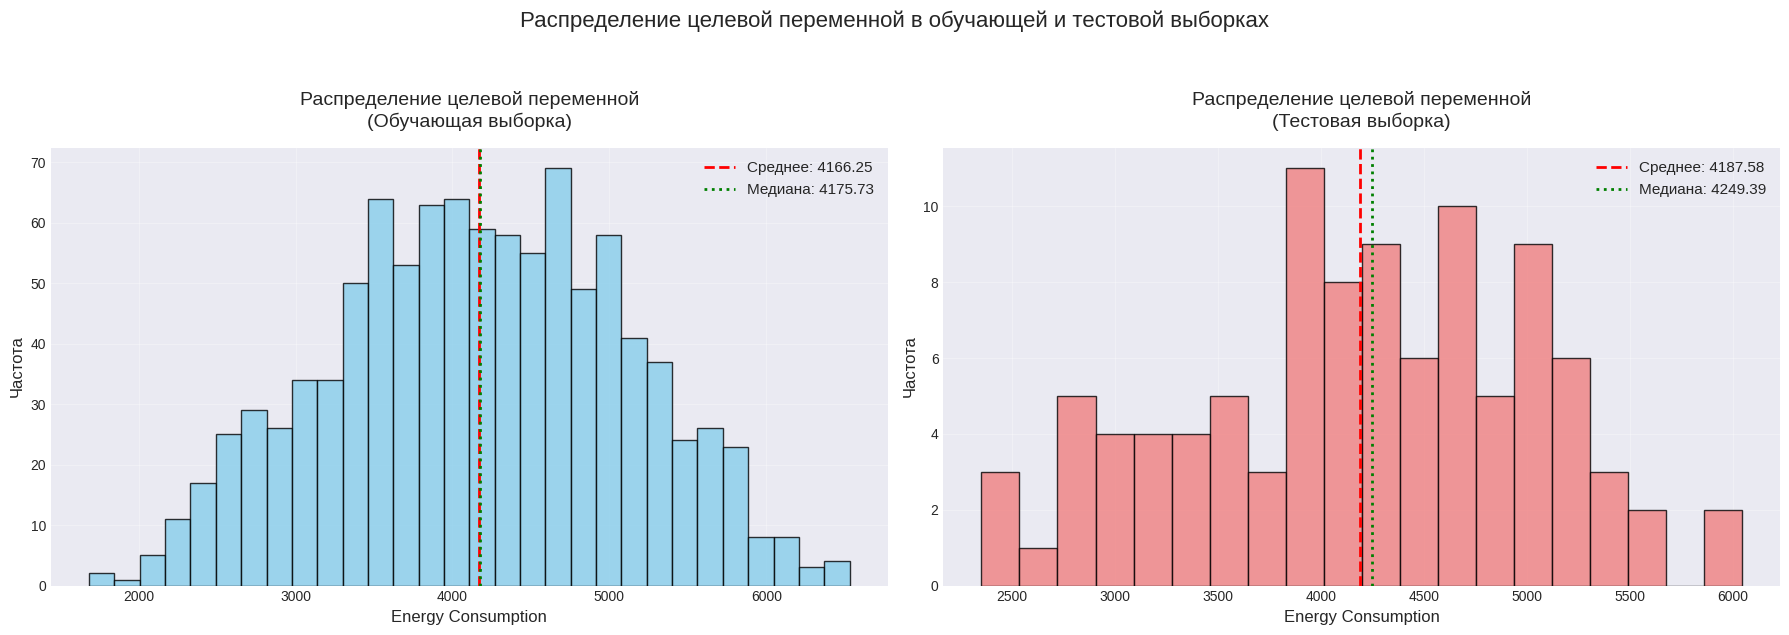

 Размер обучающих данных после предобработки: (1000, 7)
 Размер тестовых данных после предобработки: (100, 7)

 Количество признаков после one-hot кодирования: 7


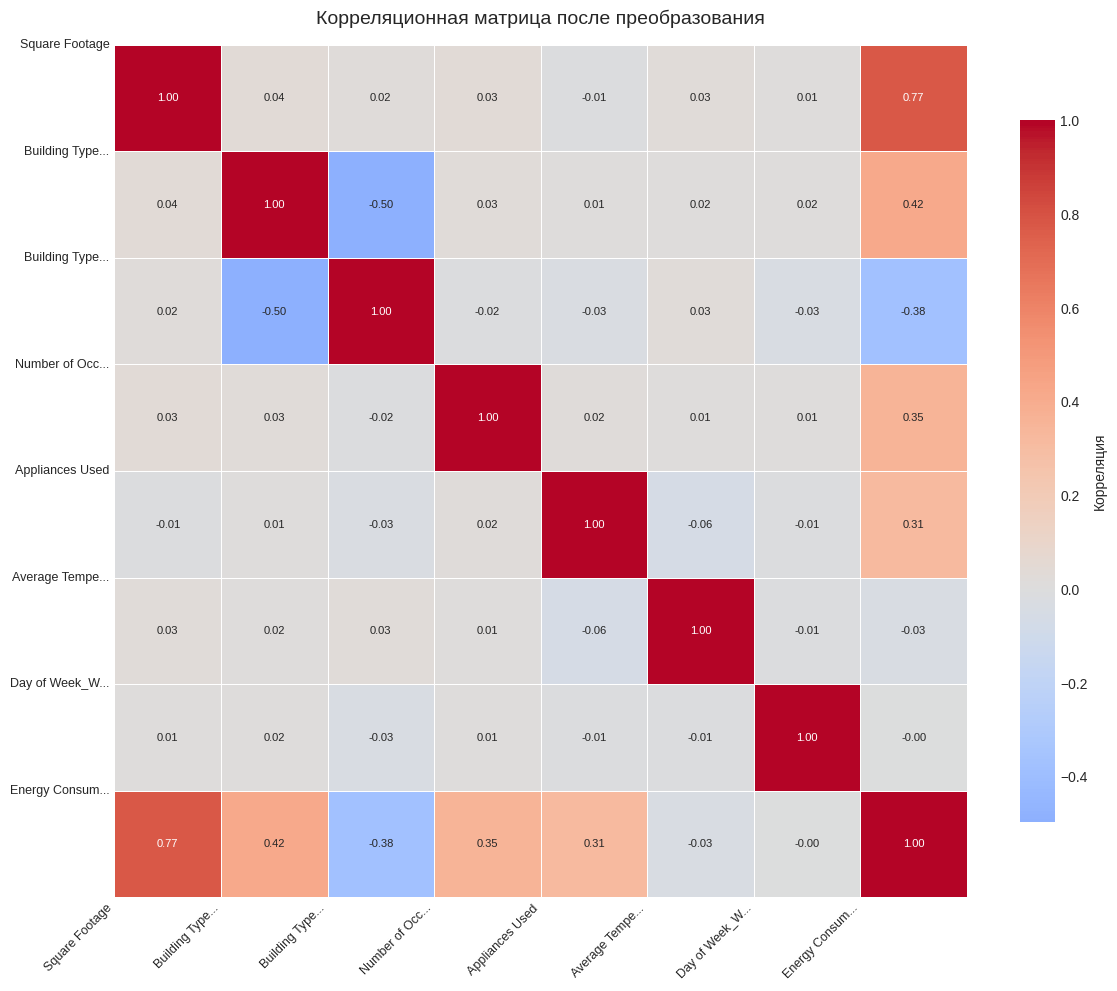

Модель обучена
Предсказания сделаны

МЕТРИКИ КАЧЕСТВА ИМПЛИМЕНТИРОВАННОЙ МОДЕЛИ:


,Метрика,Обучающая выборка,Тестовая выборка
0,MAE,4.541089,68.049969
1,MSE,37.610140,7491.499713
2,RMSE,6.132711,86.553450
3,R²,0.999957,0.989083
4,MAPE (%),0.113375,1.707160


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                           r2_score, mean_absolute_percentage_error)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

#имплиментированный регрессор
class MyGradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3,
                 min_samples_split=2, subsample=1.0, random_state=42):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.subsample = subsample
        self.random_state = random_state
        self.trees = []
        self.initial_prediction = None
        self.n_features_ = None

    class RegressionTree:
        def __init__(self, max_depth=3, min_samples_split=2):
            self.max_depth = max_depth
            self.min_samples_split = min_samples_split
            self.tree = None

        def _calculate_mse(self, y):
            if len(y) == 0:
                return 0
            return np.var(y)

        def _find_best_split(self, X, residuals):
            best_mse_reduction = -1
            best_feature = None
            best_threshold = None

            n_samples, n_features = X.shape

            for feature_idx in range(n_features):
                feature_values = np.unique(X[:, feature_idx])

                if len(feature_values) <= 1:
                    continue

                percentiles = np.linspace(10, 90, min(10, len(feature_values)))
                thresholds = np.percentile(feature_values, percentiles)

                for threshold in thresholds:
                    if threshold == feature_values.min() or threshold == feature_values.max():
                        continue

                    left_mask = X[:, feature_idx] <= threshold
                    right_mask = X[:, feature_idx] > threshold

                    if np.sum(left_mask) < self.min_samples_split or np.sum(right_mask) < self.min_samples_split:
                        continue

                    left_residuals = residuals[left_mask]
                    right_residuals = residuals[right_mask]

                    total_mse = np.var(residuals) if len(residuals) > 0 else 0
                    left_mse = np.var(left_residuals) if len(left_residuals) > 0 else 0
                    right_mse = np.var(right_residuals) if len(right_residuals) > 0 else 0

                    weight_left = len(left_residuals) / n_samples
                    weight_right = len(right_residuals) / n_samples

                    mse_reduction = total_mse - (weight_left * left_mse + weight_right * right_mse)

                    if mse_reduction > best_mse_reduction:
                        best_mse_reduction = mse_reduction
                        best_feature = feature_idx
                        best_threshold = threshold

            return best_feature, best_threshold, best_mse_reduction

        def _build_tree(self, X, residuals, depth):
            n_samples = len(residuals)

            if depth >= self.max_depth or n_samples < 2 * self.min_samples_split or np.std(residuals) < 1e-6:
                leaf_value = np.mean(residuals) if len(residuals) > 0 else 0
                return {'type': 'leaf', 'value': leaf_value}

            best_feature, best_threshold, best_mse_reduction = self._find_best_split(X, residuals)

            if best_feature is None or best_mse_reduction < 1e-6:
                leaf_value = np.mean(residuals) if len(residuals) > 0 else 0
                return {'type': 'leaf', 'value': leaf_value}

            left_mask = X[:, best_feature] <= best_threshold
            right_mask = X[:, best_feature] > best_threshold

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                leaf_value = np.mean(residuals) if len(residuals) > 0 else 0
                return {'type': 'leaf', 'value': leaf_value}

            left_subtree = self._build_tree(X[left_mask], residuals[left_mask], depth + 1)
            right_subtree = self._build_tree(X[right_mask], residuals[right_mask], depth + 1)

            node = {
                'type': 'node',
                'feature': best_feature,
                'threshold': best_threshold,
                'left': left_subtree,
                'right': right_subtree
            }

            return node

        def _predict_single(self, x, node):
            if node['type'] == 'leaf':
                return node['value']

            if x[node['feature']] <= node['threshold']:
                return self._predict_single(x, node['left'])
            else:
                return self._predict_single(x, node['right'])

        def fit(self, X, residuals):
            X = np.array(X, dtype=np.float64)
            residuals = np.array(residuals, dtype=np.float64)

            self.tree = self._build_tree(X, residuals, depth=0)
            return self

        def predict(self, X):
            X = np.array(X, dtype=np.float64)
            predictions = []

            for i in range(X.shape[0]):
                pred = self._predict_single(X[i], self.tree)
                predictions.append(pred)

            return np.array(predictions)

    def _gradient_mse(self, y_true, y_pred):
        """Градиент MSE loss: d/dy_pred[(y_true - y_pred)^2] = -2*(y_true - y_pred) = 2*(y_pred - y_true)"""
        return 2 * (y_pred - y_true)

    def fit(self, X, y):
        np.random.seed(self.random_state)
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)

        self.n_features_ = X.shape[1]

        self.initial_prediction = np.mean(y)

        current_predictions = np.full(X.shape[0], self.initial_prediction)

        self.trees = []

        for i in range(self.n_estimators):
            residuals = self._gradient_mse(y, current_predictions)

            if self.subsample < 1.0:
                n_samples = X.shape[0]
                subsample_size = int(self.subsample * n_samples)
                indices = np.random.choice(n_samples, subsample_size, replace=False)
                X_subsample = X[indices]
                residuals_subsample = residuals[indices]
            else:
                X_subsample = X
                residuals_subsample = residuals

            tree = self.RegressionTree(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )
            tree.fit(X_subsample, residuals_subsample)

            tree_predictions = tree.predict(X)

            current_predictions -= self.learning_rate * tree_predictions

            self.trees.append(tree)

            if (i + 1) % 20 == 0 or i == 0 or i == self.n_estimators - 1:
                train_mse = mean_squared_error(y, current_predictions)
                train_mae = mean_absolute_error(y, current_predictions)
                train_r2 = r2_score(y, current_predictions)

        return self

    def predict(self, X):
        X = np.array(X, dtype=np.float64)
        n_samples = X.shape[0]

        predictions = np.full(n_samples, self.initial_prediction)

        for tree in self.trees:
            predictions -= self.learning_rate * tree.predict(X)

        return predictions

# Загрузка данных
train_df = pd.read_csv('data/linear/train_energy_data.csv')
test_df = pd.read_csv('data/linear/test_energy_data.csv')

print(f"Размер обучающей выборки: {train_df.shape}")
print(f"Размер тестовой выборки: {test_df.shape}")
print(f"\n Первые 5 строк обучающей выборки:")
display(train_df.head())

print("\n Информация о данных (обучающая выборка):")
train_df.info()

print("\n Проверка пропущенных значений:")
missing_data_train = train_df.isnull().sum()
missing_data_test = test_df.isnull().sum()
print("Обучающая выборка:")
print(missing_data_train[missing_data_train > 0])
print("\nТестовая выборка:")
print(missing_data_test[missing_data_test > 0])



# преобразуем категориальные признаки в числовые
train_clean = train_df.copy()
test_clean = test_df.copy()

categorical_cols = train_clean.select_dtypes(include=['object']).columns.tolist()
numeric_cols = train_clean.select_dtypes(include=[np.number]).columns.tolist()

target_col = 'Energy Consumption'
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

print(f"\n Категориальные признаки ({len(categorical_cols)}): {categorical_cols}")
print(f"\n Числовые признаки ({len(numeric_cols)}): {numeric_cols}")


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


X_train = train_clean.drop(target_col, axis=1)
y_train = train_clean[target_col]

X_test = test_clean.drop(target_col, axis=1)
y_test = test_clean[target_col]

print(f"\n X_train: {X_train.shape}")
print(f" Y_train: {y_train.shape}")
print(f" X_test: {X_test.shape}")
print(f" Y_test: {y_test.shape}")



# посмотрим на распределение целевой переменной в обучающей и тестовых выборках
fig, axes = plt.subplots(1, 2, figsize=(18, 6))


target_values_train = train_clean[target_col]
axes[0].hist(target_values_train, bins=30, color='skyblue', edgecolor='black', alpha=0.8)
axes[0].set_title('Распределение целевой переменной\n(Обучающая выборка)', fontsize=14, pad=15)
axes[0].set_xlabel('Energy Consumption', fontsize=12)
axes[0].set_ylabel('Частота', fontsize=12)
axes[0].grid(alpha=0.3)
mean_val_train = target_values_train.mean()
median_val_train = target_values_train.median()
axes[0].axvline(mean_val_train, color='red', linestyle='--', linewidth=2,
                label=f'Среднее: {mean_val_train:.2f}')
axes[0].axvline(median_val_train, color='green', linestyle=':', linewidth=2,
                label=f'Медиана: {median_val_train:.2f}')
axes[0].legend(fontsize=11)


target_values_test = test_clean[target_col]
axes[1].hist(target_values_test, bins=20, color='lightcoral', edgecolor='black', alpha=0.8)
axes[1].set_title('Распределение целевой переменной\n(Тестовая выборка)', fontsize=14, pad=15)
axes[1].set_xlabel('Energy Consumption', fontsize=12)
axes[1].set_ylabel('Частота', fontsize=12)
axes[1].grid(alpha=0.3)
mean_val_test = target_values_test.mean()
median_val_test = target_values_test.median()
axes[1].axvline(mean_val_test, color='red', linestyle='--', linewidth=2,
                label=f'Среднее: {mean_val_test:.2f}')
axes[1].axvline(median_val_test, color='green', linestyle=':', linewidth=2,
                label=f'Медиана: {median_val_test:.2f}')
axes[1].legend(fontsize=11)

plt.suptitle('Распределение целевой переменной в обучающей и тестовой выборках',
             fontsize=16, y=1.05)
plt.tight_layout()
plt.show()



# применим преобразование, посмотрим получившуюся матрицу корреляции
X_train_processed = preprocessor.fit_transform(X_train)
print(f" Размер обучающих данных после предобработки: {X_train_processed.shape}")
X_test_processed = preprocessor.transform(X_test)
print(f" Размер тестовых данных после предобработки: {X_test_processed.shape}")

feature_names = []
feature_names.extend(numeric_cols)

if categorical_cols:
    onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    for i, col in enumerate(categorical_cols):
        categories = onehot_encoder.categories_[i]
        for cat in categories[1:]:
            feature_names.append(f"{col}_{cat}")

print(f"\n Количество признаков после one-hot кодирования: {len(feature_names)}")

X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)

if len(feature_names) > 1:
    X_train_processed_df[target_col] = y_train.values

    correlations_with_target = X_train_processed_df.corr()[target_col].drop(target_col)
    top_features = correlations_with_target.abs().sort_values(ascending=False).head(15).index.tolist()

    corr_matrix = X_train_processed_df[top_features + [target_col]].corr()

    plt.figure(figsize=(12, 10))

    sns.heatmap(corr_matrix, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8, "label": "Корреляция"},
                annot=True, fmt='.2f', annot_kws={"size": 8})

    plt.title('Корреляционная матрица после преобразования',
              fontsize=14, pad=15)

    # Форматируем подписи
    labels = []
    for col in top_features + [target_col]:
        if len(col) > 15:
            labels.append(col[:13] + '...')
        else:
            labels.append(col)

    plt.xticks(range(len(labels)), labels, rotation=45, ha='right', fontsize=9)
    plt.yticks(range(len(labels)), labels, fontsize=9)

    plt.tight_layout()
    plt.show()


# Создадим и обучим модель имплиментированную модель регрессора, берем оптимальные гиперпараметры
my_gb_regressor = MyGradientBoostingRegressor(n_estimators=200, max_depth=5, min_samples_split=2, random_state=42)

my_gb_regressor.fit(X_train_processed, y_train)
print("Модель обучена")

y_pred_train = my_gb_regressor.predict(X_train_processed)
y_pred_test = my_gb_regressor.predict(X_test_processed)
print("Предсказания сделаны")

# Вычисляем метрики
def calculate_regression_metrics(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    return {
        'Набор данных': dataset_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAPE (%)': mape * 100
    }

metrics_train = calculate_regression_metrics(y_train, y_pred_train, 'Обучающая выборка')
metrics_test = calculate_regression_metrics(y_test, y_pred_test, 'Тестовая выборка')

# Создаем DataFrame с метриками
metrics_gb = pd.DataFrame({
    'Метрика': ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE (%)'],
    'Обучающая выборка': [metrics_train['MAE'], metrics_train['MSE'], metrics_train['RMSE'],
                         metrics_train['R²'], metrics_train['MAPE (%)']],
    'Тестовая выборка': [metrics_test['MAE'], metrics_test['MSE'], metrics_test['RMSE'],
                        metrics_test['R²'], metrics_test['MAPE (%)']]
})

print("\nМЕТРИКИ КАЧЕСТВА ИМПЛИМЕНТИРОВАННОЙ МОДЕЛИ:")
display(metrics_gb)

**Имплиментированная реализация регрессора на градиентном бустинге показывает на обучающей выборке лучшие точности, чем модель из sklearn, однако на тестовой выборке результаты хуже, но не критически. Это говорит о том, что имплиментированная модель переобучается, но остается относительно эффективной по сравнению с моделью из sklearn**



# **Общий анализ всех моделей**

**В общей сложности я обучил 40 моделей, 20 из которых - регрессоры, 20 - классификаторы. Для каждой лабораторной работы использовалась своя модель и ее имплиментированая версия. Также для каждой модели было 2 варианта датасета - бейзлайн без предобработки и улучшенный бейзлайн с предобработкой данных и подбором оптимальных гиперпараметров для моделей.**

Датасеты для классификации и регрессии были взяты с сайта *Kaggle*. В задаче классификации мы классифицируем поведение клиента, уйдет он или нет. В задаче регрессии мы предсказываем затраты на электроэнергию. Бейзлайн представляет собой датасет, в котором просто удаляются категориальные признаки, без их кодирования (кодируется только один признак *"TotalCharges"* для классификаторов, потому что он имеет уж слишком большое влияние на целевую переменную), а также простое обучение модели без подбора гиперпараметров. Отброс категориальных признаков не очень хорошо сказывается на задачах регрессии, поскольку это кратно ухудшает метрики. Дело здесь еще в самом датасете, который для задачи регресии очень небольшой - всего 4 признака на бейзлане и 7 на улучшенном бейзлайне, не считая целевой переменной. С задачей классификации дела обстоят лучше, потому что датасет там обширнее и предсказания могут быть точнее, а метрики соответственно лучше. Для улучшенного бейзлайна я решил закодировать категориальные признаки, также проверить наличие пропусков в данных и использовать кросс-валидацию для подбора гиперпараметров у sklearn моделей. Для имплиментированных моделей я использовал гиперпараметры из кросс-валидации той же модели sklearn с некими изменениями, которые либо были необходимы из-за реализации, либо просто давали лучшие метрики. Перейдем к анализу моделей.

## **Классификаторы**

В общем, предобработка данных существенно улучшает качество классификации у всех алгоритмов, особенно у KNN, логистической регрессии и градиентного бустинга. Основной прирост обеспечен тем, что категориальные признаки вносят существенный вклад в определение целевого класса. Средние улучшения по метрикам получились такие:

+3–6% Accuracy

+5–10% Precision

+6–12% Recall

+4–8% F1-score

+4–10% ROC-AUC

Теперь поподробнее для каждой модели

### **KNN**

Модели KNN из sklearn и имплиментированные показали улучшение показателей после предобработки. Дело здесь в наличии закодированных категорий, которые давали более осмысленные расстояния между объектами.

### **Логистическая регрессия**

Логистическая регрессиия заметнее всего реагирует на предобработку, давая наилучший прирост по метрикам.

### **Решающие деревья**

В бейзлайне теряется очень много информации из-за отсутствия категориальных признаков, отсюда и плохие метрики. Однако после предобработки метрики улучшаются из-за кодирования категориальных признаков.

### **Случайный лес**

Метрики заметно улучшаются для реализации sklearn после предобработки. Имплиментированная реализация на бейзлайне показывает в целом неплохие результаты, но имеет проблемы с чрезмерно низкими Recall и F1 метриками. Это указывает либо на недочет в реализации, либо на дисбаланс классов в выборке.

### **Градиентный бустинг**

Эта модель дает самые стабильные результаты, улучшаются метрики у обеих версий реализации после кодирования категориальных признаков.

**_____________________________________________________________________________________________________________**

## **Регрессоры**

Так как бейзлайн версия данных содержит всего 4 признака, это заметно ограничивает качество моделей. В улучшенном бейзлайне признаков становится больше — 7 после кодирования, однако их по-прежнему недостаточно для устойчивого обучения сложных моделей. Это приводит к тому, что практически все алгоритмы регрессии показывают высокие абсолютные ошибки (MAE, MSE, RMSE), хотя относительная ошибка MAPE остаётся на приемлемом уровне — до 10%, что обусловлено большим масштабом целевой переменной.

### **KNN**

KNN оказался чувствителен к малому количеству признаков и высокой размерности после кодирования. В бейзлайне ошибки большие, однако после предобработки качество улучшается, за счёт более информативных расстояний между объектами.

### **Линейная регрессия**

Линейная регрессия показывает аномально высокие метрики на улучшенном бейзлайне. Это объясняется структурой данных: после кодирования категориальных признаков образуется линейная зависимость целевой переменной от признаков, отсюда и такие результаты.

### **Решающие деревья**

На бейзлайне решающие деревья теряют качество из-за отсутствия категориальных признаков. После предобработки ситуация улучшается - ошибки снижаются, а R^2 достигает высоких значений.

### **Случайный лес**

Случайный лес на данных после предобработки показывает заметный прирост качества.  Однако имплиментированная модель имеет менее стабильные результаты, что может быть связано с особенностями реализации или датасета.

### **Градиентный бустинг**

Градиентный бустинг стал лучшей моделью. На улучшенном бейзлайне он показывает минимальные ошибки среди всех алгоритмов. Обе версии, sklearn и имплиментированная, демонстрируют стабильные и высокие результаты.

**_____________________________________________________________________________________________________________**


### **Общий вывод**

**В ходе работы было установлено, что предобработка данных играет решающую роль как в классификационных, так и в регрессионных задачах, существенно повышая качество всех используемых моделей. Модели классификации особенно выигрывают от кодирования категориальных признаков, демонстрируя стабильный рост всех метрик. В задаче регрессии качество также сильно зависит от структуры самой модели.**


**Данные о всех метриках лежат всех моделей лежат в файле metrics.doc**